# PUC-Rio
## Departamento de Engenharia Elétrica
## Trabalho 3 - Mapas de Kohonen

Estudante: Breinner Farid Espinosa Ortiz


In [1]:
!git clone https://github.com/mdrs-thiago/minisom
import os
os.chdir('minisom')

fatal: destination path 'minisom' already exists and is not an empty directory.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale

from minisom import MiniSom

In [3]:
dataset = pd.read_csv('https://raw.githubusercontent.com/mdrs-thiago/PUC_Redes_Neurais/main/datasets/c_thyroid.csv')

In [4]:
values = dataset.values[:,:-1]

## Parte 1 - Testando configurações

Nesta primeira etapa, iremos investigar como a configuração do mapa pode mudar de acordo com a escolha de parâmetros.

##### 1. Escolha os parâmetros para o primeiro teste usando SOM. Para cada parâmetro, justifique sua escolha. Avalie o resultado.

In [5]:
#decay function

def decay_fcn(lr,actual_t,max_t):
    '''
    Função para decaimento da taxa de aprendizado.

    ## INPUTS:
    lr - Taxa de aprendizado inicial
    actual_t - Tempo atual da iteração
    max_t - Tempo máximo da iteração

    ## OUTPUT:
    - taxa de aprendizado atualizada.
    '''

    new_lr = lr/(1 + 2*actual_t/max_t)

    return new_lr


m = 10 #Dimensão X do mapa de Kohonen
n = 10 #Dimensão Y do mapa de Kohonen


lr_ordering = 0.001 #Taxa de aprendizado - Ordering phase
lr_finetuning = 0.0001 #Taxa de aprendizado - Finetuning phase

topology = "hexagonal"

ordering_time = 1000
finetuning_time = 10000
decay_fun =  decay_fcn


#Dimensão do vetor de entrada
input_len = values.shape[1]

X = minmax_scale(values)





In [6]:
som = MiniSom(m,n,input_len,learning_rate=lr_ordering,topology=topology,decay_function=decay_fcn)
som.pca_weights_init(values)

som.train_random(X, ordering_time, verbose=True)


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.4491157866313956


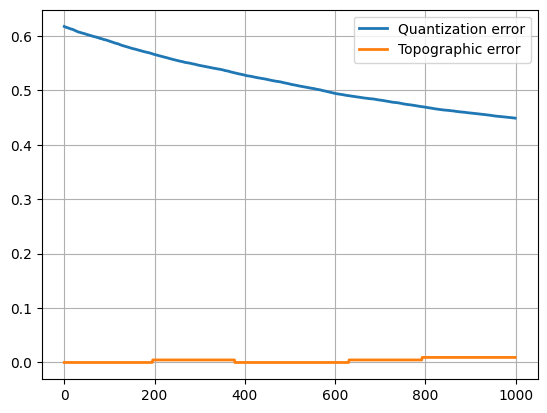

In [7]:
plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

In [8]:
som._learning_rate = lr_finetuning #Para mudar a taxa de aprendizado durante o período de finetuning

som.train_random(X, finetuning_time, verbose=True)


 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.326555958578191


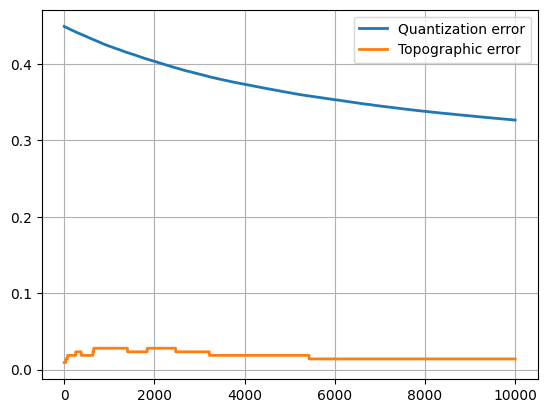

In [9]:
plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

prueba 2, modificando n y m

### Resposta
Para a seleção dos parâmetros do mapa de Kohonen, foram consideradas tanto as características do conjunto de dados quanto o impacto de cada parâmetro no comportamento do SOM.

Inicialmente, foi realizado um teste reduzindo-se a dimensão do mapa (parâmetros m e n) pela metade. Essa decisão baseou-se no fato de que, havendo poucas classes no dataset, não seria necessário utilizar um grande número de neurônios — o que contribuiria para evitar o sobreajuste e facilitaria a interpretação dos resultados.

No entanto, ao analisar os gráficos de erro de quantização e erro topográfico, observou-se que o desempenho do modelo não melhorou de forma significativa. Os valores dos erros permaneceram semelhantes ou ligeiramente superiores em comparação com a configuração original com mais neurônios. Isso indica que, embora a redução do número de neurônios possa facilitar a visualização e mitigar o sobreajuste, neste caso específico, ela não resultou em uma melhoria na qualidade do agrupamento, conforme os erros medidos.



In [10]:
#decay function

def decay_fcn(lr,actual_t,max_t):
    '''
    Função para decaimento da taxa de aprendizado.

    ## INPUTS:
    lr - Taxa de aprendizado inicial
    actual_t - Tempo atual da iteração
    max_t - Tempo máximo da iteração

    ## OUTPUT:
    - taxa de aprendizado atualizada.
    '''

    new_lr = lr/(1 + 2*actual_t/max_t)

    return new_lr


m = 5 #Dimensão X do mapa de Kohonen
n = 5 #Dimensão Y do mapa de Kohonen


lr_ordering = 0.001 #Taxa de aprendizado - Ordering phase
lr_finetuning = 0.0001 #Taxa de aprendizado - Finetuning phase

topology = "hexagonal"

ordering_time = 1000
finetuning_time = 10000
decay_fun =  decay_fcn


#Dimensão do vetor de entrada
input_len = values.shape[1]

X = minmax_scale(values)


In [11]:
som = MiniSom(m,n,input_len,learning_rate=lr_ordering,topology=topology,decay_function=decay_fcn)
som.pca_weights_init(values)

som.train_random(X, ordering_time, verbose=True)


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.4470984211652797


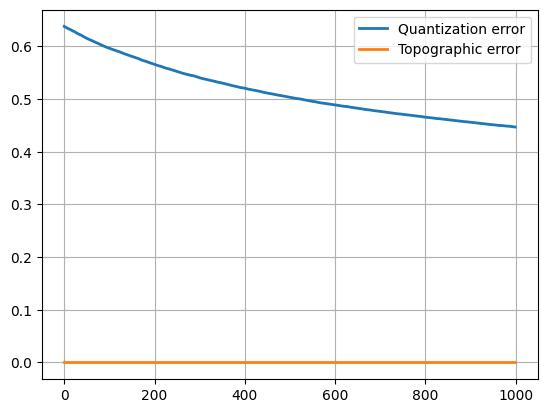

In [12]:
plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

In [13]:
som._learning_rate = lr_finetuning #Para mudar a taxa de aprendizado durante o período de finetuning

som.train_random(X, finetuning_time, verbose=True)

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.32910546195256146


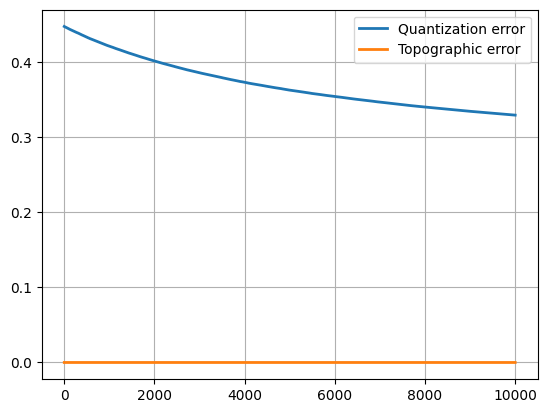

In [14]:
plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()



prueba 3, modificando lr_ordering y lr_finetuning

### Reposta

Na terceira prova, foram realizadas modificações nas taxas de aprendizado. Foi utilizado um valor inicial relativamente alto para a taxa de aprendizado durante a fase de ordenamento, com o objetivo de acelerar o aprendizado inicial do mapa — ainda que isso pudesse aumentar o erro topológico. Para a fase de ajuste fino, foi escolhida uma taxa menor, buscando reduzir variações excessivas nos pesos e alcançar uma convergência mais estável.

Nos gráficos obtidos, observa-se que o comportamento do erro é mais instável no início, mas tende a melhorar em ambos os parâmetros (erro de quantização e erro topográfico) à medida que o treinamento avança. Isso evidencia a importância de ajustar adequadamente as taxas de aprendizado, de forma a equilibrar a velocidade de aprendizado com a estabilidade do modelo.

In [15]:

#decay function

def decay_fcn(lr,actual_t,max_t):
    '''
    Função para decaimento da taxa de aprendizado.

    ## INPUTS:
    lr - Taxa de aprendizado inicial
    actual_t - Tempo atual da iteração
    max_t - Tempo máximo da iteração

    ## OUTPUT:
    - taxa de aprendizado atualizada.
    '''
    new_lr = lr/(1 + 2*actual_t/max_t)

    return new_lr


m = 5 #Dimensão X do mapa de Kohonen
n = 5 #Dimensão Y do mapa de Kohonen

dim = [m, n]

lr_ordering = 0.02 #Taxa de aprendizado - Ordering phase
lr_finetuning = 0.005 #Taxa de aprendizado - Finetuning phase

#lr = [lr_ordering, lr_ordering ]

topology = "hexagonal"

ordering_time = 900
finetuning_time = 10000

#tuning_time = [ordering_time, finetuning_time]
decay_fun =  decay_fcn


#Dimensão do vetor de entrada
input_len = values.shape[1]

X = minmax_scale(values)


In [16]:
som = MiniSom(m,n,input_len,learning_rate=lr_ordering,topology=topology,decay_function=decay_fcn)
som.pca_weights_init(values)

som.train_random(X, ordering_time, verbose=True)

 [ 900 / 900 ] 100% - 0:00:00 left 
 quantization error: 0.1673814723623759


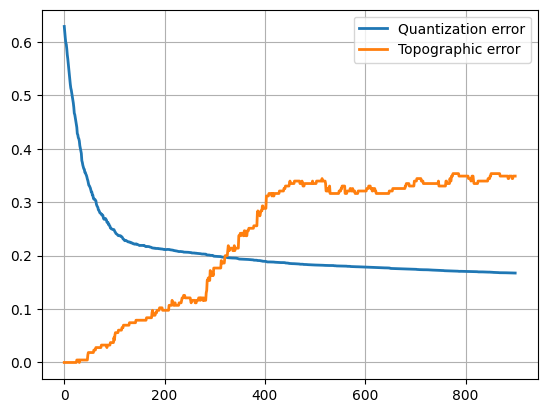

In [17]:
plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

In [18]:
som._learning_rate = lr_finetuning #Para mudar a taxa de aprendizado durante o período de finetuning

som.train_random(X, finetuning_time, verbose=True)

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.12915329494582461


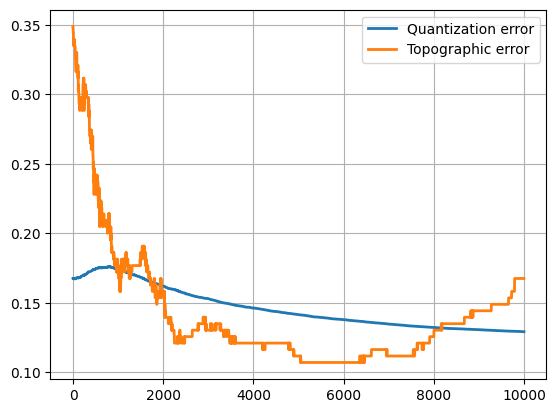

In [19]:
plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

Prueba 4

### Reposta

O melhor desempenho foi obtido ao utilizar dimensões de 6x6 para o mapa, resultando em 36 neurônios. Essa escolha se justifica pelo fato de que, como mencionado anteriormente, o conjunto de dados possui poucas classes e não demanda um número elevado de unidades processadoras. Assim, evita-se o sobreajuste e facilita-se a interpretação dos resultados.

Para a taxa de aprendizado, optou-se por um valor elevado (0.1) durante a fase de ordenamento, permitindo que o modelo aprendesse rapidamente e reduzisse o erro topológico inicial. Na fase de ajuste fino, foi utilizada uma taxa menor (0.005), com o objetivo de tornar o ajuste dos pesos mais preciso e estável. O tempo de ordenamento foi mantido relativamente baixo para evitar grandes variações, enquanto o tempo de ajuste fino foi prolongado para permitir uma convergência adequada.

A topologia hexagonal foi mantida, pois permite que cada neurônio tenha mais vizinhos com os quais interagir, favorecendo uma melhor organização e adaptação do mapa durante o treinamento.

In [20]:

#decay function

def decay_fcn(lr,actual_t,max_t):
    '''
    Função para decaimento da taxa de aprendizado.

    ## INPUTS:
    lr - Taxa de aprendizado inicial
    actual_t - Tempo atual da iteração
    max_t - Tempo máximo da iteração

    ## OUTPUT:
    - taxa de aprendizado atualizada.
    '''
    new_lr = lr/(1 + 2*actual_t/max_t)

    return new_lr


m = 6 #Dimensão X do mapa de Kohonen
n = 6 #Dimensão Y do mapa de Kohonen

lr_ordering = 0.1 #Taxa de aprendizado - Ordering phase
lr_finetuning = 0.005 #Taxa de aprendizado - Finetuning phase


topology = "hexagonal"

ordering_time = 1000
finetuning_time = 10000

#tuning_time = [ordering_time, finetuning_time]
decay_fun =  decay_fcn


#Dimensão do vetor de entrada
input_len = values.shape[1]

X = minmax_scale(values)


Observa-se nos gráficos um comportamento mais estável e uma redução considerável nos erros. Os valores finais foram:

In [21]:
som = MiniSom(m,n,input_len,learning_rate=lr_ordering,topology=topology,decay_function=decay_fcn)
som.pca_weights_init(values)

som.train_random(X, ordering_time, verbose=True)

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.11468423530774091


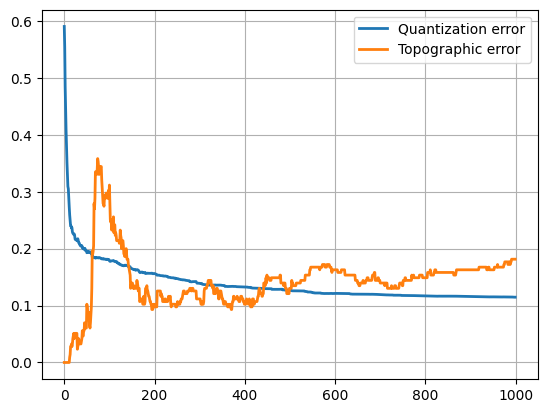

In [22]:
plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

In [23]:
som._learning_rate = lr_finetuning #Para mudar a taxa de aprendizado durante o período de finetuning

som.train_random(X, finetuning_time, verbose=True)

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.11137092518519585


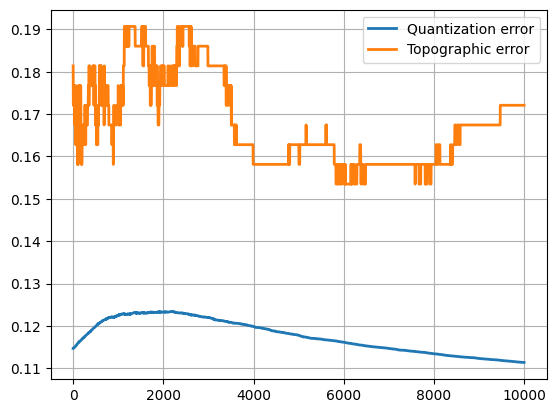

In [24]:
plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

A análise dos mapas de componentes mostrou que algumas variáveis apresentam padrões muito semelhantes de distribuição no mapa de Kohonen. Isso sugere que há uma possível dependência ou correlação entre essas variáveis, uma vez que seus valores estão sendo representados de forma similar pelos neurônios. Apesar de não ser possível identificar grupos bem definidos apenas pela cor nos mapas, ao observar a distribuição das ativações (Winning Map) e os valores médios por neurônio, percebe-se que o SOM foi capaz de agrupar amostras semelhantes em regiões específicas do mapa. Ainda assim, há neurônios que representam amostras de mais de uma classe, o que pode indicar sobreposição entre os grupos no espaço original de características.

Essas observações reforçam a importância de combinar diferentes formas de visualização como U-Matrix, mapas de componentes e mapa de vencedores.   para interpretar corretamente os resultados do SOM.


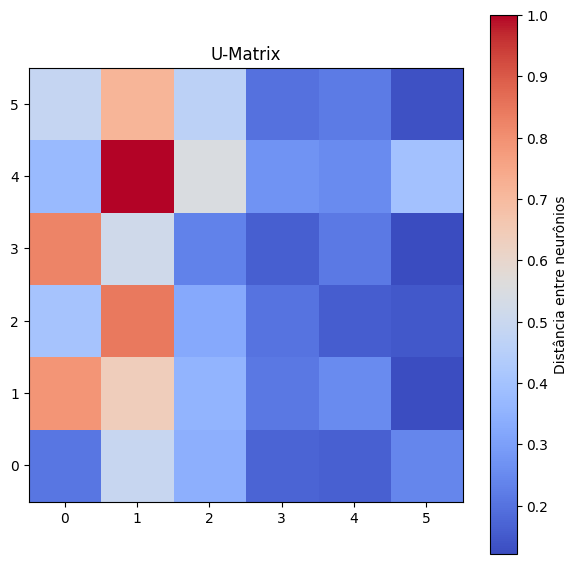

In [25]:
# Calcular a U-Matrix
umatrix = som.distance_map()

# Plotar
plt.figure(figsize=(7, 7))
plt.imshow(umatrix.T, cmap='coolwarm', origin='lower')  # .T para transpor se necessário
plt.colorbar(label='Distância entre neurônios')
plt.title('U-Matrix')
plt.show()


Winning map (número de vezes que cada neurônio foi vencedor):
[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0. 13.  0.  0.  0.]
 [ 0.  6.  6.  7. 17.  0.]
 [ 1.  9. 18. 15. 23.  1.]
 [ 0. 11. 15. 25.  2.  6.]
 [ 0.  9. 12.  6.  8.  5.]]


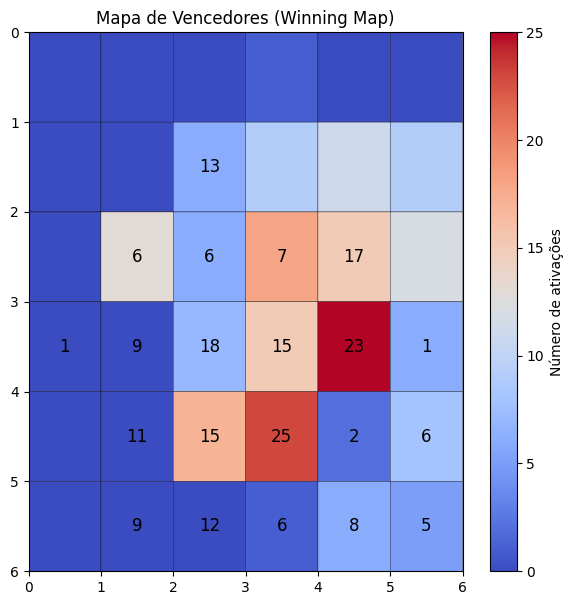

In [26]:
# Inicializar o recalcular o mapa de vitórias
win_map = np.zeros((som.x, som.y))  

# Para cada amostra, incrementar o contador da BMU
for x in X:
    i, j = som.winner(x)
    win_map[i, j] += 1

print("Winning map (número de vezes que cada neurônio foi vencedor):")
print(win_map)

# Visualização
plt.figure(figsize=(7, 7))
plt.pcolor(win_map.T, cmap='coolwarm', edgecolors='k') 
plt.colorbar(label='Número de ativações')
plt.title('Mapa de Vencedores (Winning Map)')

# Adiciona os valores dentro das células
for i in range(win_map.shape[0]):
    for j in range(win_map.shape[1]):
        count = int(win_map[i, j])
        if count > 0:
            plt.text(j + 0.5, i + 0.5, str(count),
                     ha='center', va='center', color='black', fontsize=12)

plt.gca().invert_yaxis()  # opcional, se quiser alinhar com U-Matrix
plt.show()


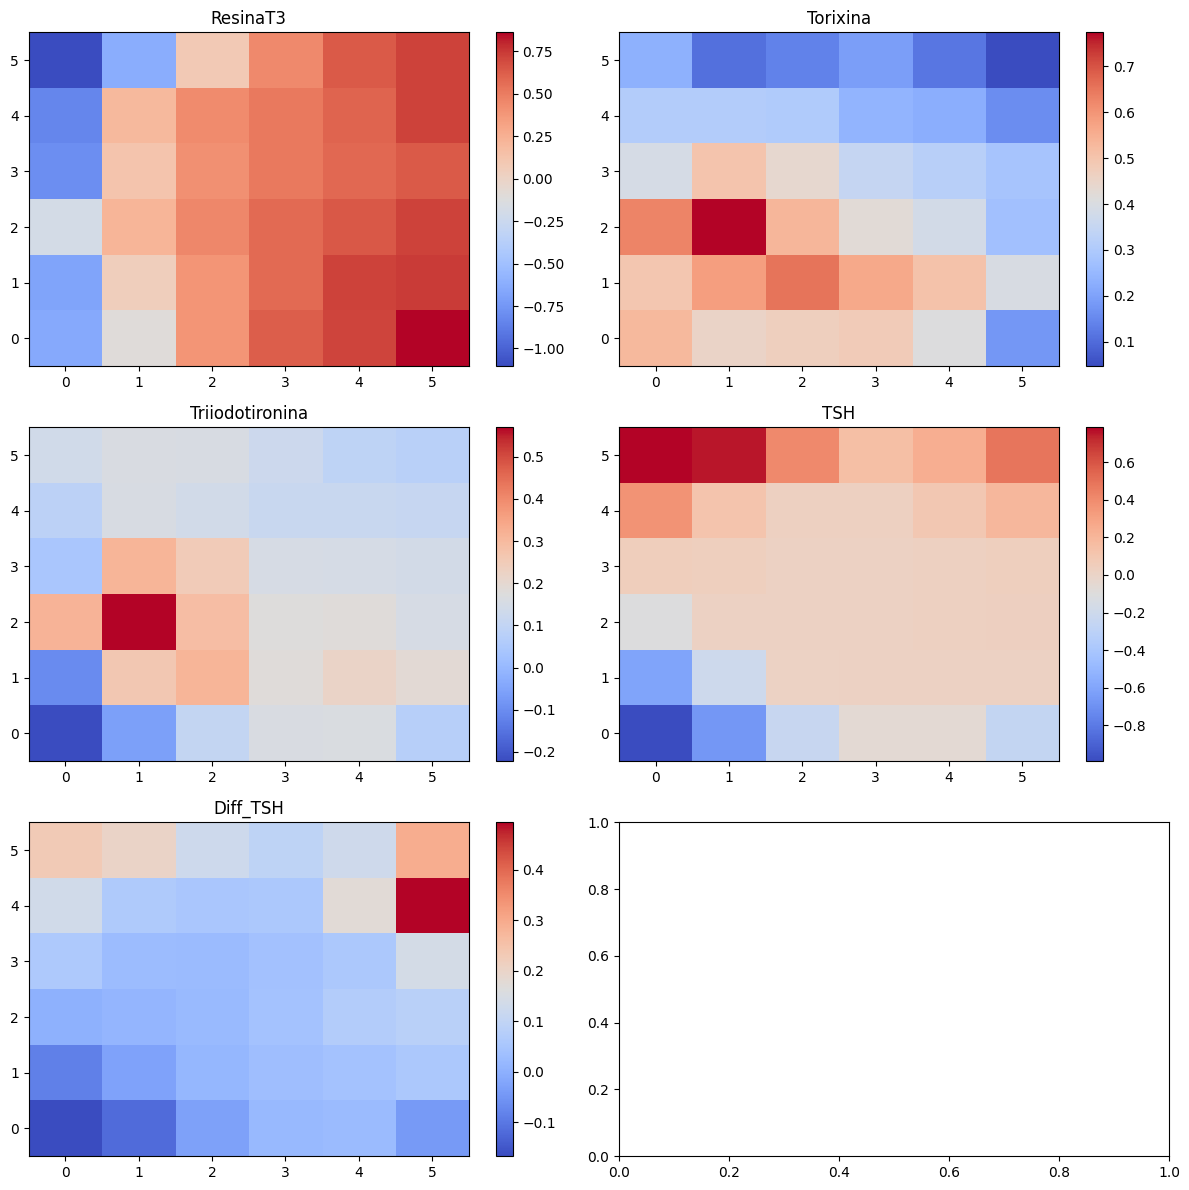

ResinaT3: 0.0491176126
Torixina: 0.0421603573
Triiodotironina: 0.0448726115
TSH: 0.0173838420
Diff_TSH: 0.0350160417


In [27]:
feature_names = dataset.columns[:-1]  
weights = som.get_weights()
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()
for i in range(input_len):
	im = axes[i].imshow(weights[:, :, i].T, cmap='coolwarm', origin='lower', aspect='auto')
	axes[i].set_title(feature_names[i])
	fig.colorbar(im, ax=axes[i])
plt.tight_layout()
plt.show()

errors = []

for i in range(input_len):
    feature_error = 0
    for x in X:
        bmu = som.winner(x)
        weight = som.get_weights()[bmu[0], bmu[1], i]
        feature_error += abs(x[i] - weight)
    mean_error = feature_error / len(X)
    errors.append(mean_error)


##### 2. Modifique a topologia da rede. Teste diferentes valores e avalie o resultado.

### Resposta 
Para variar a topologia do mapa, foi alterada a disposição dos neurônios de "hexagonal" para "retangular". Além disso, também foram realizados testes com tamanhos maiores de rede, aumentando o número total de neurônios.

Observou-se que, com a topologia retangular, a organização dos dados no mapa foi preservada e, surpreendentemente, os resultados obtidos foram ligeiramente melhores em termos de erro de quantização e topográfico. Isso pode estar relacionado à combinação da nova topologia com o maior número de neurônios, o que permitiu uma representação mais precisa dos dados e uma melhor separação entre os grupos.

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.11184208454306373


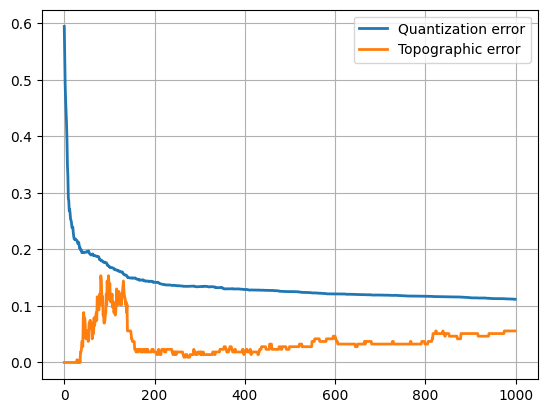

In [52]:
#decay function

def decay_fcn(lr,actual_t,max_t):
    '''
    Função para decaimento da taxa de aprendizado.

    ## INPUTS:
    lr - Taxa de aprendizado inicial
    actual_t - Tempo atual da iteração
    max_t - Tempo máximo da iteração

    ## OUTPUT:
    - taxa de aprendizado atualizada.
    '''
    new_lr = lr/(1 + 2*actual_t/max_t)

    return new_lr


m = 6 #Dimensão X do mapa de Kohonen
n = 6 #Dimensão Y do mapa de Kohonen

lr_ordering = 0.1 #Taxa de aprendizado - Ordering phase
lr_finetuning = 0.005 #Taxa de aprendizado - Finetuning phase


topology = "rectangular"

ordering_time = 1000
finetuning_time = 10000

#tuning_time = [ordering_time, finetuning_time]
decay_fun =  decay_fcn


#Dimensão do vetor de entrada
input_len = values.shape[1]

X = minmax_scale(values)

som = MiniSom(m,n,input_len,learning_rate=lr_ordering,topology=topology,decay_function=decay_fcn)
som.pca_weights_init(values)

som.train_random(X, ordering_time, verbose=True)

plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()


 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.11147266905917284


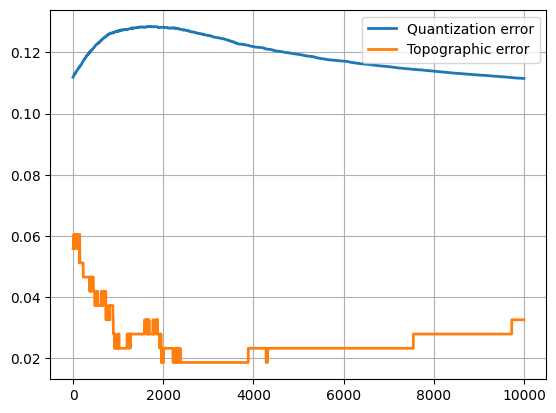

In [53]:
som._learning_rate = lr_finetuning #Para mudar a taxa de aprendizado durante o período de finetuning
som.train_random(X, finetuning_time, verbose=True)

plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.10464999635178951


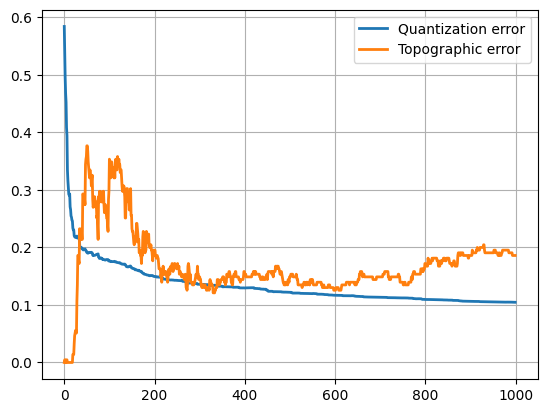

In [30]:

def decay_fcn(lr,actual_t,max_t):
    '''
    Função para decaimento da taxa de aprendizado.

    ## INPUTS:
    lr - Taxa de aprendizado inicial
    actual_t - Tempo atual da iteração
    max_t - Tempo máximo da iteração

    ## OUTPUT:
    - taxa de aprendizado atualizada.
    '''
    new_lr = lr/(1 + 2*actual_t/max_t)

    return new_lr


m = 16 #Dimensão X do mapa de Kohonen
n = 16 #Dimensão Y do mapa de Kohonen

#dim = [m, n]

lr_ordering = 0.1 #Taxa de aprendizado - Ordering phase
lr_finetuning = 0.005 #Taxa de aprendizado - Finetuning phase


topology = "rectangular"

ordering_time = 1000
finetuning_time = 10000

#tuning_time = [ordering_time, finetuning_time]

decay_fun =  decay_fcn


#Dimensão do vetor de entrada
input_len = values.shape[1]

X = minmax_scale(values)

som = MiniSom(m,n,input_len,learning_rate=lr_ordering,topology=topology,decay_function=decay_fcn)
som.pca_weights_init(values)

som.train_random(X, ordering_time, verbose=True)

plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.10050966730645816


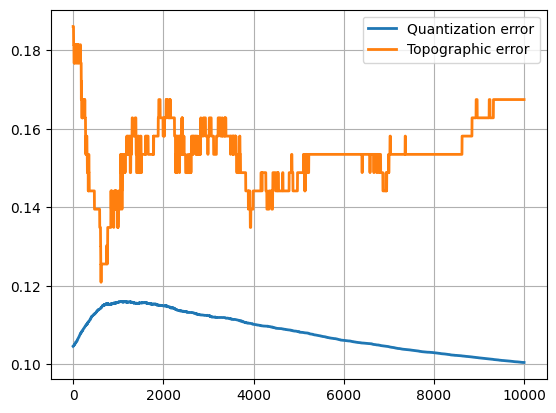

In [31]:
som._learning_rate = lr_finetuning #Para mudar a taxa de aprendizado durante o período de finetuning
som.train_random(X, finetuning_time, verbose=True)

plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

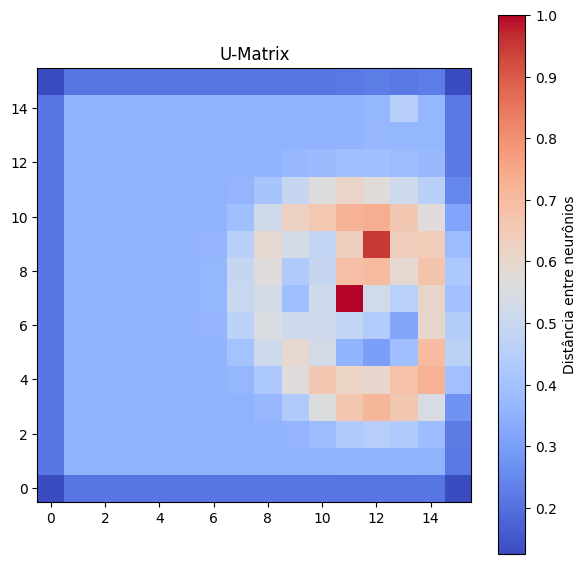

In [32]:
# Calcular a U-Matrix
umatrix = som.distance_map()

# Plotar
plt.figure(figsize=(7, 7))
plt.imshow(umatrix.T, cmap='coolwarm', origin='lower')  # .T para transpor se necessário
plt.colorbar(label='Distância entre neurônios')
plt.title('U-Matrix')
plt.show()

##### 3. Modifique a normalização dos dados de entrada e avalie o resultado obtido. Esta mudança tem algum efeito no mapa gerado?

### Resposta 
Para este experimento, foi utilizada a normalização dos dados de entrada por meio do StandardScaler, que centraliza os dados em média zero e desvio padrão igual a um. Essa abordagem foi comparada com a normalização utilizada anteriormente, que aplicava o minmax_scale para restringir os valores ao intervalo [0, 1]. Observou-se que o desempenho foi inferior em comparação com a configuração baseada no minmax_scale.

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.5818408492307335


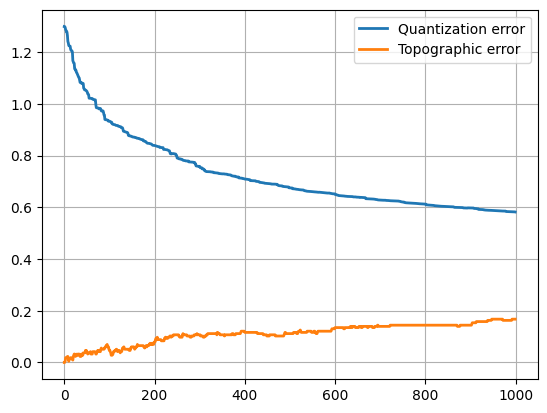

In [33]:
from sklearn.preprocessing import StandardScaler

def decay_fcn(lr,actual_t,max_t):
    '''
    Função para decaimento da taxa de aprendizado.

    ## INPUTS:
    lr - Taxa de aprendizado inicial
    actual_t - Tempo atual da iteração
    max_t - Tempo máximo da iteração

    ## OUTPUT:
    - taxa de aprendizado atualizada.
    '''
    new_lr = lr/(1 + 2*actual_t/max_t)

    return new_lr


m = 16 #Dimensão X do mapa de Kohonen
n = 16 #Dimensão Y do mapa de Kohonen

#dim = [m, n]

lr_ordering = 0.1 #Taxa de aprendizado - Ordering phase
lr_finetuning = 0.005 #Taxa de aprendizado - Finetuning phase


topology = "rectangular"

ordering_time = 1000
finetuning_time = 10000

#tuning_time = [ordering_time, finetuning_time]

decay_fun =  decay_fcn


#Dimensão do vetor de entrada
input_len = values.shape[1]

X = StandardScaler().fit_transform(values)

som = MiniSom(m,n,input_len,learning_rate=lr_ordering,topology=topology,decay_function=decay_fcn)
som.pca_weights_init(values)

som.train_random(X, ordering_time, verbose=True)

plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.5321422122448699


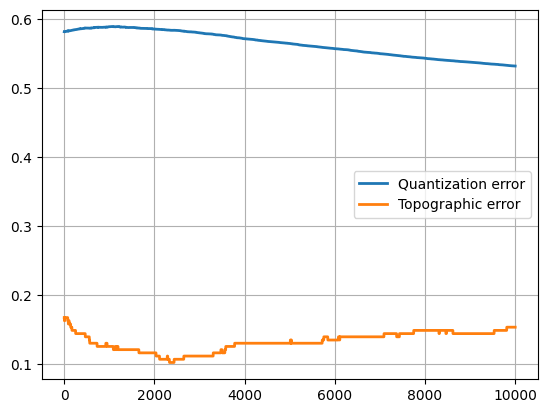

In [34]:
som._learning_rate = lr_finetuning #Para mudar a taxa de aprendizado durante o período de finetuning
som.train_random(X, finetuning_time, verbose=True)

plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

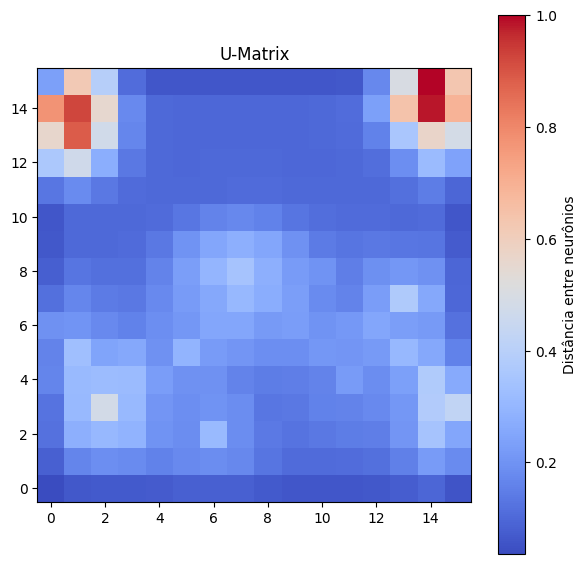

In [35]:
# Calcular a U-Matrix
umatrix = som.distance_map()

# Plotar
plt.figure(figsize=(7, 7))
plt.imshow(umatrix.T, cmap='coolwarm', origin='lower')  # .T para transpor se necessário
plt.colorbar(label='Distância entre neurônios')
plt.title('U-Matrix')
plt.show()

##### 4. Modifique o processo de treinamento durante a fase de ordenação. Avalie o resultado gerado.

### Teste trocando o ordering_time

 [ 300 / 300 ] 100% - 0:00:00 left 
 quantization error: 0.14922884750762824


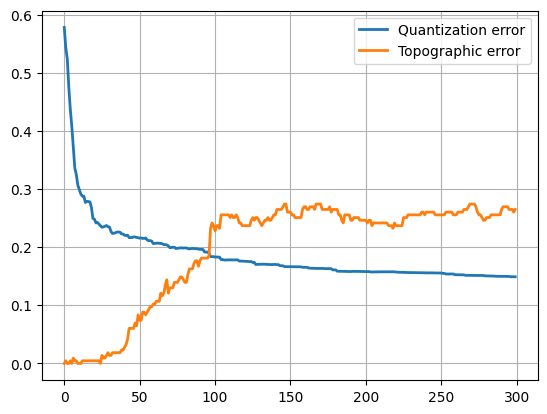

In [36]:
from sklearn.preprocessing import StandardScaler

def decay_fcn(lr,actual_t,max_t):
    '''
    Função para decaimento da taxa de aprendizado.

    ## INPUTS:
    lr - Taxa de aprendizado inicial
    actual_t - Tempo atual da iteração
    max_t - Tempo máximo da iteração

    ## OUTPUT:
    - taxa de aprendizado atualizada.
    '''
    new_lr = lr/(1 + 2*actual_t/max_t)

    return new_lr


m = 16 #Dimensão X do mapa de Kohonen
n = 16 #Dimensão Y do mapa de Kohonen

#dim = [m, n]

lr_ordering = 0.1 #Taxa de aprendizado - Ordering phase
lr_finetuning = 0.005 #Taxa de aprendizado - Finetuning phase


topology = "rectangular"

ordering_time = 300
finetuning_time = 10000

#tuning_time = [ordering_time, finetuning_time]

decay_fun =  decay_fcn


#Dimensão do vetor de entrada
input_len = values.shape[1]

X = minmax_scale(values)

som = MiniSom(m,n,input_len,learning_rate=lr_ordering,topology=topology,decay_function=decay_fcn)
som.pca_weights_init(values)

som.train_random(X, ordering_time, verbose=True)

plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.11428099268534098


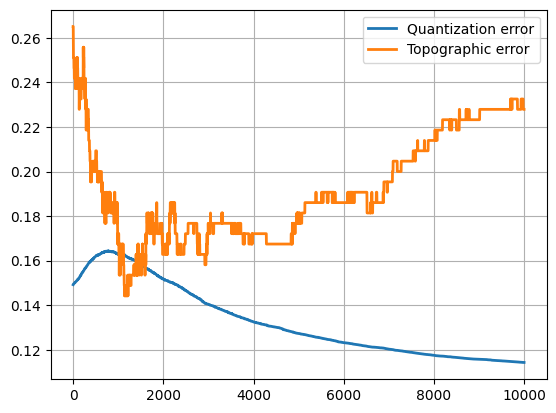

In [37]:
som._learning_rate = lr_finetuning #Para mudar a taxa de aprendizado durante o período de finetuning
som.train_random(X, finetuning_time, verbose=True)

plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

 [ 6000 / 6000 ] 100% - 0:00:00 left 
 quantization error: 0.058967194324942795


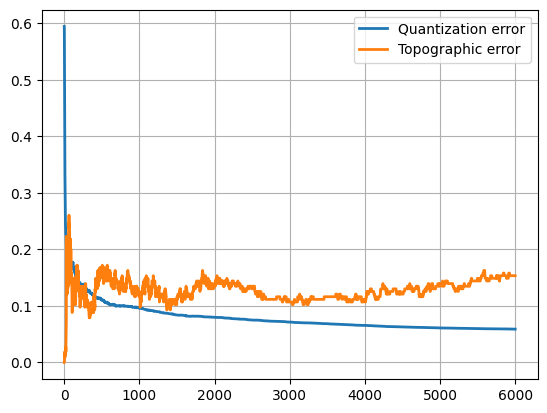

In [38]:
from sklearn.preprocessing import StandardScaler

def decay_fcn(lr,actual_t,max_t):
    '''
    Função para decaimento da taxa de aprendizado.

    ## INPUTS:
    lr - Taxa de aprendizado inicial
    actual_t - Tempo atual da iteração
    max_t - Tempo máximo da iteração

    ## OUTPUT:
    - taxa de aprendizado atualizada.
    '''
    new_lr = lr/(1 + 2*actual_t/max_t)

    return new_lr


m = 16 #Dimensão X do mapa de Kohonen
n = 16 #Dimensão Y do mapa de Kohonen

#dim = [m, n]

lr_ordering = 0.1 #Taxa de aprendizado - Ordering phase
lr_finetuning = 0.005 #Taxa de aprendizado - Finetuning phase


topology = "rectangular"

ordering_time = 6000
finetuning_time = 10000

#tuning_time = [ordering_time, finetuning_time]

decay_fun =  decay_fcn


#Dimensão do vetor de entrada
input_len = values.shape[1]

X = minmax_scale(values)

som = MiniSom(m,n,input_len,learning_rate=lr_ordering,topology=topology,decay_function=decay_fcn)
som.pca_weights_init(values)

som.train_random(X, ordering_time, verbose=True)

plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.06463196987372631


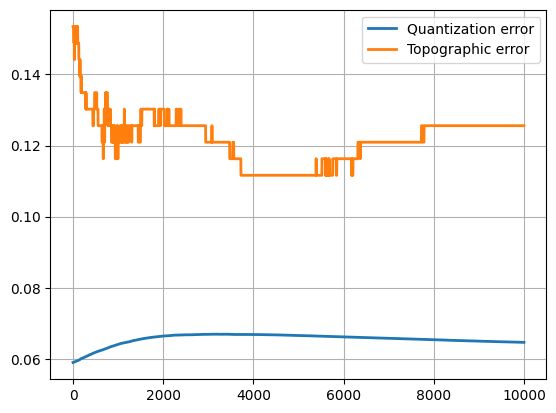

In [39]:
som._learning_rate = lr_finetuning #Para mudar a taxa de aprendizado durante o período de finetuning
som.train_random(X, finetuning_time, verbose=True)

plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

### Teste trocando o lr_ordering

 [ 6000 / 6000 ] 100% - 0:00:00 left 
 quantization error: 0.12041155521758577


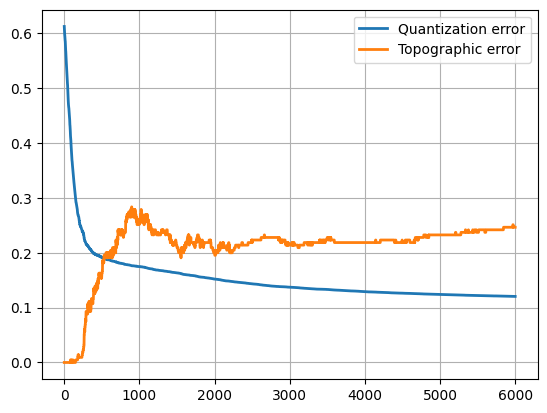

In [40]:
from sklearn.preprocessing import StandardScaler

def decay_fcn(lr,actual_t,max_t):
    '''
    Função para decaimento da taxa de aprendizado.

    ## INPUTS:
    lr - Taxa de aprendizado inicial
    actual_t - Tempo atual da iteração
    max_t - Tempo máximo da iteração

    ## OUTPUT:
    - taxa de aprendizado atualizada.
    '''
    new_lr = lr/(1 + 2*actual_t/max_t)

    return new_lr


m = 16 #Dimensão X do mapa de Kohonen
n = 16 #Dimensão Y do mapa de Kohonen

#dim = [m, n]

lr_ordering = 0.01 #Taxa de aprendizado - Ordering phase
lr_finetuning = 0.005 #Taxa de aprendizado - Finetuning phase


topology = "rectangular"

ordering_time = 6000
finetuning_time = 10000

#tuning_time = [ordering_time, finetuning_time]

decay_fun =  decay_fcn


#Dimensão do vetor de entrada
input_len = values.shape[1]

X = minmax_scale(values)

som = MiniSom(m,n,input_len,learning_rate=lr_ordering,topology=topology,decay_function=decay_fcn)
som.pca_weights_init(values)

som.train_random(X, ordering_time, verbose=True)

plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.10643743918558737


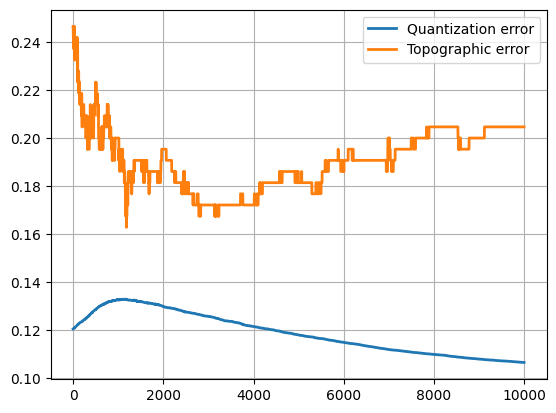

In [41]:
som._learning_rate = lr_finetuning #Para mudar a taxa de aprendizado durante o período de finetuning
som.train_random(X, finetuning_time, verbose=True)

plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

 [ 6000 / 6000 ] 100% - 0:00:00 left 
 quantization error: 0.01814867801467997


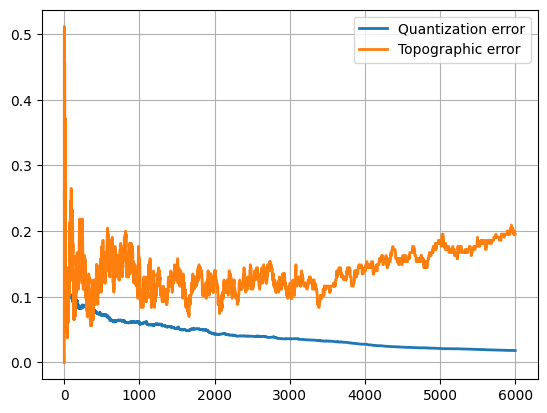

In [42]:
from sklearn.preprocessing import StandardScaler

def decay_fcn(lr,actual_t,max_t):
    '''
    Função para decaimento da taxa de aprendizado.

    ## INPUTS:
    lr - Taxa de aprendizado inicial
    actual_t - Tempo atual da iteração
    max_t - Tempo máximo da iteração

    ## OUTPUT:
    - taxa de aprendizado atualizada.
    '''
    new_lr = lr/(1 + 2*actual_t/max_t)

    return new_lr


m = 16 #Dimensão X do mapa de Kohonen
n = 16 #Dimensão Y do mapa de Kohonen

#dim = [m, n]

lr_ordering = 0.9 #Taxa de aprendizado - Ordering phase
lr_finetuning = 0.005 #Taxa de aprendizado - Finetuning phase


topology = "rectangular"

ordering_time = 6000
finetuning_time = 10000

#tuning_time = [ordering_time, finetuning_time]

decay_fun =  decay_fcn


#Dimensão do vetor de entrada
input_len = values.shape[1]

X = minmax_scale(values)

som = MiniSom(m,n,input_len,learning_rate=lr_ordering,topology=topology,decay_function=decay_fcn)
som.pca_weights_init(values)

som.train_random(X, ordering_time, verbose=True)

plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.025571297456585557


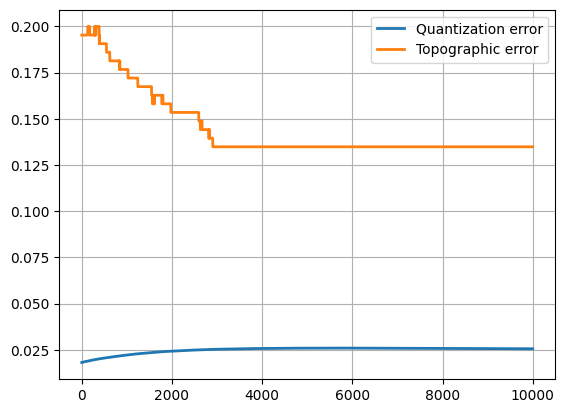

In [43]:
som._learning_rate = lr_finetuning #Para mudar a taxa de aprendizado durante o período de finetuning
som.train_random(X, finetuning_time, verbose=True)

plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

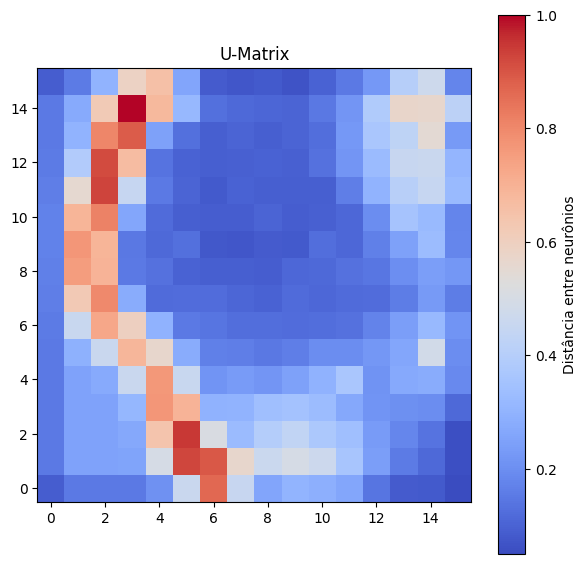

In [44]:
# Calcular a U-Matrix
umatrix = som.distance_map()

# Plotar
plt.figure(figsize=(7, 7))
plt.imshow(umatrix.T, cmap='coolwarm', origin='lower')  # .T para transpor se necessário
plt.colorbar(label='Distância entre neurônios')
plt.title('U-Matrix')
plt.show()

#### Resposta 
Foram realizados diferentes testes para analisar o efeito dos parâmetros de treinamento durante a fase de ordenação. Primeiramente, foi testada uma redução no tempo de treinamento (ordering_time = 300), o que resultou em alta instabilidade no erro topográfico. Em seguida, o tempo foi aumentado para 6000 iterações, onde se observou uma melhor convergência.

Também foi modificada a taxa de aprendizado (lr_ordering), testando valores baixos (0.01) e altos (0.9). Com valores baixos, o aprendizado foi lento e ineficaz. Por outro lado, com lr = 0.9, obteve-se o melhor resultado, com erro de quantização reduzido e erro topográfico estável.

##### 5. Modifique o processo de treinamento durante a fase de ajuste fino. Avalie o resultado gerado.

### Teste trocando o finetuning_time

 [ 6000 / 6000 ] 100% - 0:00:00 left 
 quantization error: 0.015180754879339313


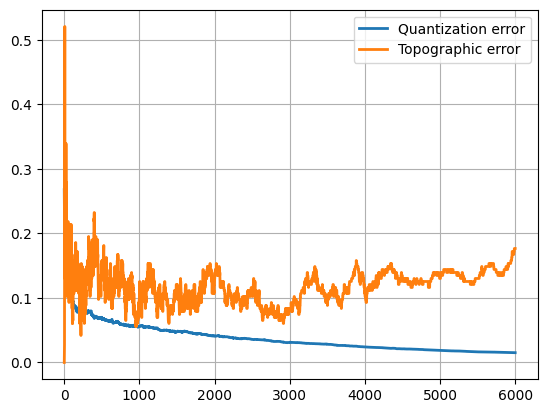

In [63]:
from sklearn.preprocessing import StandardScaler

def decay_fcn(lr,actual_t,max_t):
    '''
    Função para decaimento da taxa de aprendizado.

    ## INPUTS:
    lr - Taxa de aprendizado inicial
    actual_t - Tempo atual da iteração
    max_t - Tempo máximo da iteração

    ## OUTPUT:
    - taxa de aprendizado atualizada.
    '''
    new_lr = lr/(1 + 2*actual_t/max_t)

    return new_lr


m = 16 #Dimensão X do mapa de Kohonen
n = 16 #Dimensão Y do mapa de Kohonen

#dim = [m, n]

lr_ordering = 0.9 #Taxa de aprendizado - Ordering phase
lr_finetuning = 0.005 #Taxa de aprendizado - Finetuning phase


topology = "rectangular"

ordering_time = 6000
finetuning_time = 6000

#tuning_time = [ordering_time, finetuning_time]

decay_fun =  decay_fcn


#Dimensão do vetor de entrada
input_len = values.shape[1]

X = minmax_scale(values)

som = MiniSom(m,n,input_len,learning_rate=lr_ordering,topology=topology,decay_function=decay_fcn)
som.pca_weights_init(values)

som.train_random(X, ordering_time, verbose=True)

plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

 [ 6000 / 6000 ] 100% - 0:00:00 left 
 quantization error: 0.019015441610132945


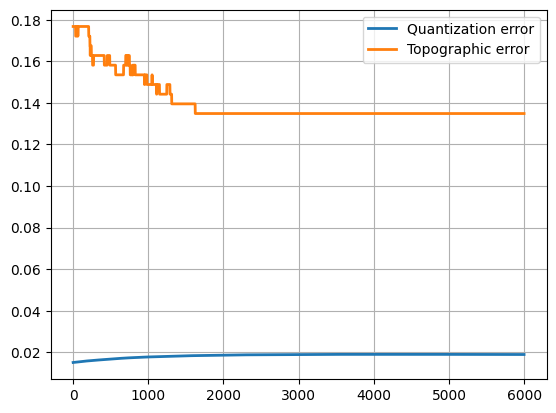

In [64]:
som._learning_rate = lr_finetuning #Para mudar a taxa de aprendizado durante o período de finetuning
som.train_random(X, finetuning_time, verbose=True)

plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

 [ 6000 / 6000 ] 100% - 0:00:00 left 
 quantization error: 0.019339377428423458


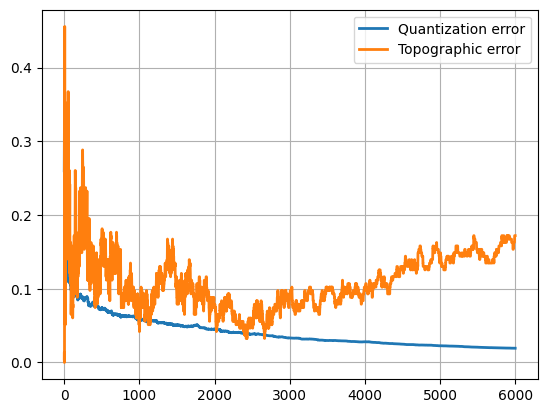

In [66]:
from sklearn.preprocessing import StandardScaler

def decay_fcn(lr,actual_t,max_t):
    '''
    Função para decaimento da taxa de aprendizado.

    ## INPUTS:
    lr - Taxa de aprendizado inicial
    actual_t - Tempo atual da iteração
    max_t - Tempo máximo da iteração

    ## OUTPUT:
    - taxa de aprendizado atualizada.
    '''
    new_lr = lr/(1 + 2*actual_t/max_t)

    return new_lr


m = 16 #Dimensão X do mapa de Kohonen
n = 16 #Dimensão Y do mapa de Kohonen

#dim = [m, n]

lr_ordering = 0.9 #Taxa de aprendizado - Ordering phase
lr_finetuning = 0.001 #Taxa de aprendizado - Finetuning phase


topology = "rectangular"

ordering_time = 6000
finetuning_time = 20000

#tuning_time = [ordering_time, finetuning_time]

decay_fun =  decay_fcn


#Dimensão do vetor de entrada
input_len = values.shape[1]

X = minmax_scale(values)

som = MiniSom(m,n,input_len,learning_rate=lr_ordering,topology=topology,decay_function=decay_fcn)
som.pca_weights_init(values)

som.train_random(X, ordering_time, verbose=True)

plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

 [ 20000 / 20000 ] 100% - 0:00:00 left 
 quantization error: 0.021807080137102405


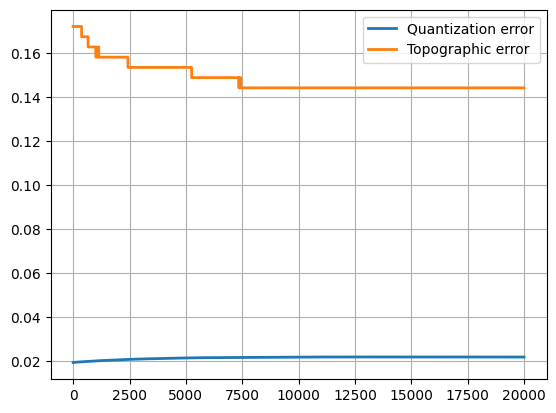

In [67]:
som._learning_rate = lr_finetuning #Para mudar a taxa de aprendizado durante o período de finetuning
som.train_random(X, finetuning_time, verbose=True)

plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

### Teste trocando o lr_finetuning

 [ 6000 / 6000 ] 100% - 0:00:00 left 
 quantization error: 0.012261718186624491


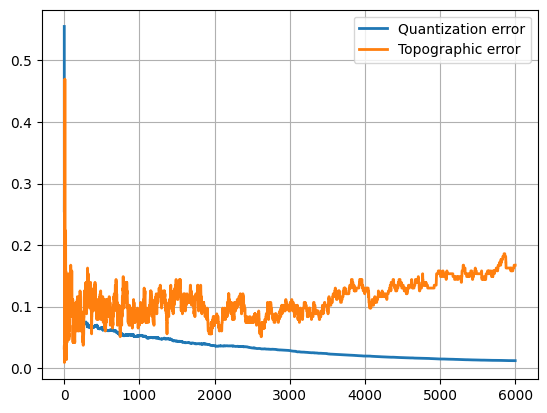

In [68]:
from sklearn.preprocessing import StandardScaler

def decay_fcn(lr,actual_t,max_t):
    '''
    Função para decaimento da taxa de aprendizado.

    ## INPUTS:
    lr - Taxa de aprendizado inicial
    actual_t - Tempo atual da iteração
    max_t - Tempo máximo da iteração

    ## OUTPUT:
    - taxa de aprendizado atualizada.
    '''
    new_lr = lr/(1 + 2*actual_t/max_t)

    return new_lr


m = 16 #Dimensão X do mapa de Kohonen
n = 16 #Dimensão Y do mapa de Kohonen

#dim = [m, n]

lr_ordering = 0.9 #Taxa de aprendizado - Ordering phase
lr_finetuning = 0.001 #Taxa de aprendizado - Finetuning phase


topology = "rectangular"

ordering_time = 6000
finetuning_time = 10000

#tuning_time = [ordering_time, finetuning_time]

decay_fun =  decay_fcn


#Dimensão do vetor de entrada
input_len = values.shape[1]

X = minmax_scale(values)

som = MiniSom(m,n,input_len,learning_rate=lr_ordering,topology=topology,decay_function=decay_fcn)
som.pca_weights_init(values)

som.train_random(X, ordering_time, verbose=True)

plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.013483816781832667


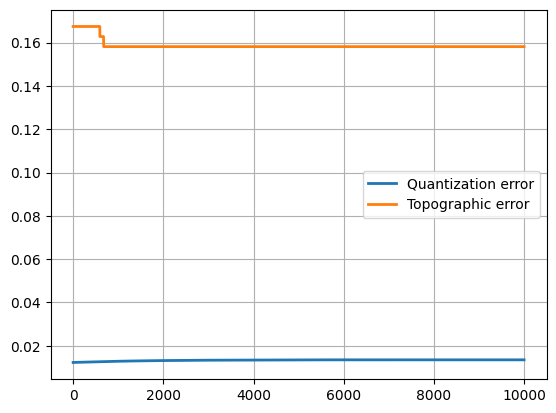

In [69]:
som._learning_rate = lr_finetuning #Para mudar a taxa de aprendizado durante o período de finetuning
som.train_random(X, finetuning_time, verbose=True)

plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

 [ 6000 / 6000 ] 100% - 0:00:00 left 
 quantization error: 0.01680449336110267


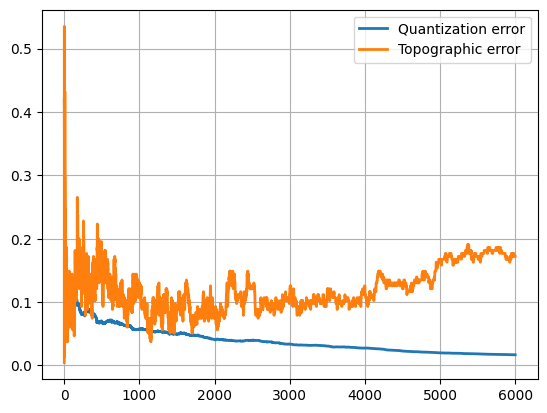

In [70]:
from sklearn.preprocessing import StandardScaler

def decay_fcn(lr,actual_t,max_t):
    '''
    Função para decaimento da taxa de aprendizado.

    ## INPUTS:
    lr - Taxa de aprendizado inicial
    actual_t - Tempo atual da iteração
    max_t - Tempo máximo da iteração

    ## OUTPUT:
    - taxa de aprendizado atualizada.
    '''
    new_lr = lr/(1 + 2*actual_t/max_t)

    return new_lr


m = 16 #Dimensão X do mapa de Kohonen
n = 16 #Dimensão Y do mapa de Kohonen

#dim = [m, n]

lr_ordering = 0.9 #Taxa de aprendizado - Ordering phase
lr_finetuning = 0.01 #Taxa de aprendizado - Finetuning phase


topology = "rectangular"

ordering_time = 6000
finetuning_time = 10000

#tuning_time = [ordering_time, finetuning_time]

decay_fun =  decay_fcn


#Dimensão do vetor de entrada
input_len = values.shape[1]

X = minmax_scale(values)

som = MiniSom(m,n,input_len,learning_rate=lr_ordering,topology=topology,decay_function=decay_fcn)
som.pca_weights_init(values)

som.train_random(X, ordering_time, verbose=True)

plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.028166787458256574


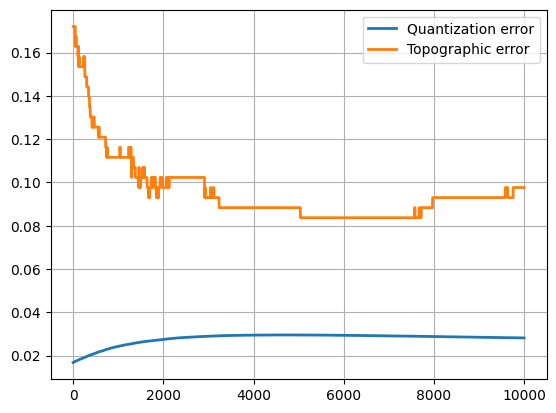

In [71]:
som._learning_rate = lr_finetuning #Para mudar a taxa de aprendizado durante o período de finetuning
som.train_random(X, finetuning_time, verbose=True)

plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

### Resposta

Durante a fase de ajuste fino, foram realizados dois conjuntos de experimentos. No primeiro, variou-se o tempo de treinamento (finetuning_time), utilizando os valores de 6000 e 20000 iterações.
Na primeira prova (6000), observou-se um melhor desempenho, com baixo erro de quantização. O modelo conseguiu convergir mais rapidamente, embora tenha apresentado leves oscilações no erro topográfico.
Na segunda prova (20000), o treinamento foi mais estável, mas não houve melhorias significativas nos erros.

Em seguida, modificou-se a taxa de aprendizado (lr_finetuning), testando os valores de 0.001 e 0.01, em comparação com o valor original de 0.005.
Com lr = 0.001, o modelo apresentou um aprendizado mais lento, mas com maior estabilidade.
Por outro lado, com lr = 0.01, o treinamento foi mais rápido, porém, assim como no teste com maior tempo, ocorreram oscilações no erro topográfico.

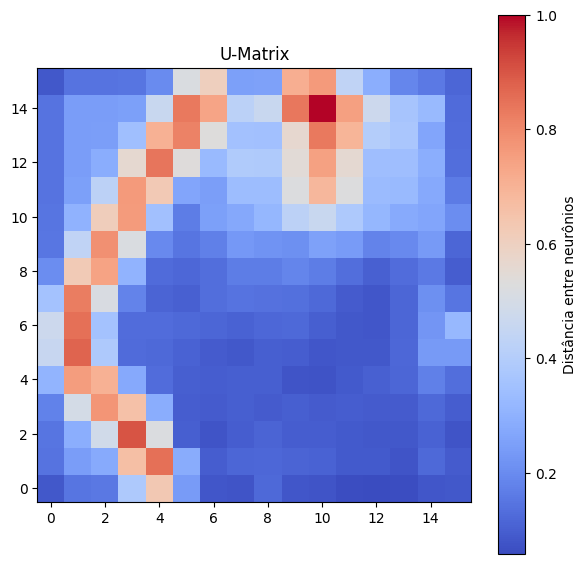

In [72]:
# Calcular a U-Matrix
umatrix = som.distance_map()

# Plotar
plt.figure(figsize=(7, 7))
plt.imshow(umatrix.T, cmap='coolwarm', origin='lower')  # .T para transpor se necessário
plt.colorbar(label='Distância entre neurônios')
plt.title('U-Matrix')
plt.show()

##### 6. Modifique a função de decaimento da taxa de aprendizado. Esta mudança gera algum impacto no mapa gerado? Justifique

### Resposta
Foi modificada a função de decaimento da taxa de aprendizado, substituindo a função polinomial original por uma função de decaimento exponencial. Observou-se uma convergência mais suave do erro de quantização e uma maior estabilidade nas etapas finais do treinamento, embora com uma velocidade de aprendizado reduzida nas primeiras iterações.

Em relação à U-Matrix e ao mapa de vencedores, os resultados mostraram uma organização clara dos grupos, com melhor separação entre regiões e uma ativação mais equilibrada entre os neurônios.

 [ 6000 / 6000 ] 100% - 0:00:00 left 
 quantization error: 0.015283055885661354


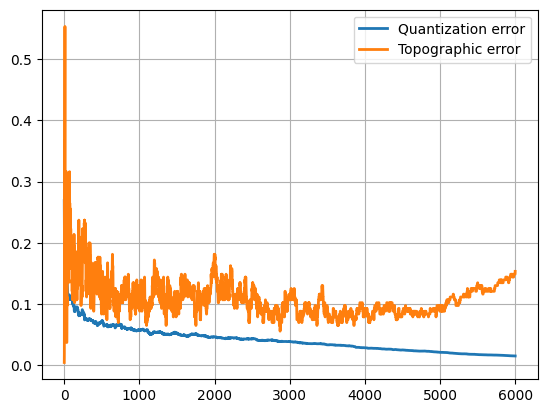

In [86]:
from sklearn.preprocessing import StandardScaler

def decay_fcn(lr,actual_t,max_t):
    '''
    Função para decaimento da taxa de aprendizado.

    ## INPUTS:
    lr - Taxa de aprendizado inicial
    actual_t - Tempo atual da iteração
    max_t - Tempo máximo da iteração

    ## OUTPUT:
    - taxa de aprendizado atualizada.
    '''
    new_lr = lr * np.exp(-actual_t / max_t) # Exponential decay

    return new_lr


m = 16 #Dimensão X do mapa de Kohonen
n = 16 #Dimensão Y do mapa de Kohonen

#dim = [m, n]

lr_ordering = 0.9 #Taxa de aprendizado - Ordering phase
lr_finetuning = 0.001 #Taxa de aprendizado - Finetuning phase


topology = "rectangular"

ordering_time = 6000
finetuning_time = 10000

#tuning_time = [ordering_time, finetuning_time]

decay_fun =  decay_fcn


#Dimensão do vetor de entrada
input_len = values.shape[1]

X = minmax_scale(values)

som = MiniSom(m,n,input_len,learning_rate=lr_ordering,topology=topology,decay_function=decay_fcn)
som.pca_weights_init(values)

som.train_random(X, ordering_time, verbose=True)

plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.017004522920160824


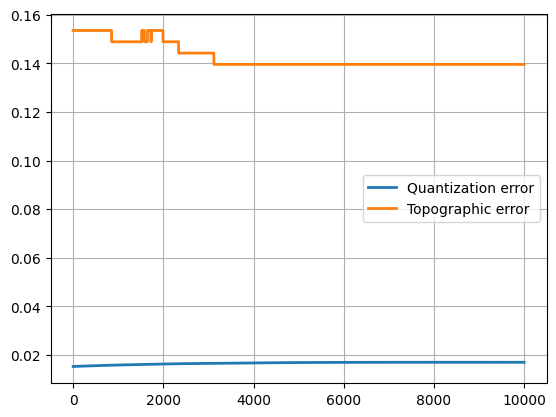

In [87]:
som._learning_rate = lr_finetuning #Para mudar a taxa de aprendizado durante o período de finetuning
som.train_random(X, finetuning_time, verbose=True)

plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

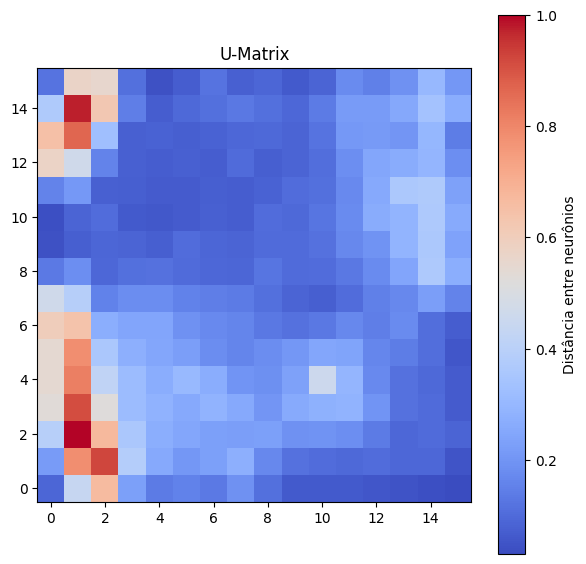

In [89]:
# Calcular a U-Matrix
umatrix = som.distance_map()

# Plotar
plt.figure(figsize=(7, 7))
plt.imshow(umatrix.T, cmap='coolwarm', origin='lower')  # .T para transpor se necessário
plt.colorbar(label='Distância entre neurônios')
plt.title('U-Matrix')
plt.show()

Winning map (número de vezes que cada neurônio foi vencedor):
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0.]
 [0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 2. 1. 1. 1.]
 [1. 0. 0. 0. 1. 0. 1. 0. 1. 2. 1. 2. 1. 1. 0. 1.]
 [1. 0. 2. 0. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2. 1.]
 [0. 2. 0. 0. 0. 0. 1. 1. 1. 1. 2. 2. 1. 0. 1. 1.]
 [0. 0. 0. 1. 0. 1. 2. 2. 0. 2. 2. 3. 2. 0. 2. 0.]
 [1. 1. 1. 0. 1. 1. 0. 2. 1. 1. 1. 2. 0. 2. 1. 1.]
 [0. 1. 0. 0. 0. 1. 2. 2. 1. 0. 2. 1. 2. 1. 2. 1.]
 [1. 1. 1. 0. 1. 0. 1. 1. 1. 2. 1. 1. 2. 2. 1. 2.]
 [2. 0. 1. 0. 2. 0. 2. 1. 0. 1. 1. 1. 0. 0. 0. 1.]
 [2. 2. 3. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.]
 [3. 2. 1. 1. 2. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
 [1. 2. 1. 2. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1.]
 [3. 1. 1. 2. 2. 1. 2. 1. 0. 2. 1. 0. 2. 0. 1. 1.]]


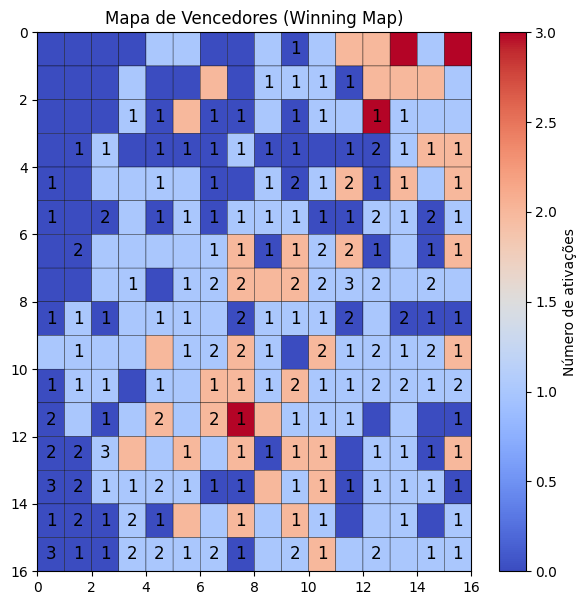

In [90]:
# Inicializar o recalcular o mapa de vitórias
win_map = np.zeros((som.x, som.y))  

# Para cada amostra, incrementar o contador da BMU
for x in X:
    i, j = som.winner(x)
    win_map[i, j] += 1

print("Winning map (número de vezes que cada neurônio foi vencedor):")
print(win_map)

# Visualização
plt.figure(figsize=(7, 7))
plt.pcolor(win_map.T, cmap='coolwarm', edgecolors='k') 
plt.colorbar(label='Número de ativações')
plt.title('Mapa de Vencedores (Winning Map)')

# Adiciona os valores dentro das células
for i in range(win_map.shape[0]):
    for j in range(win_map.shape[1]):
        count = int(win_map[i, j])
        if count > 0:
            plt.text(j + 0.5, i + 0.5, str(count),
                     ha='center', va='center', color='black', fontsize=12)

plt.gca().invert_yaxis()  # opcional, se quiser alinhar com U-Matrix
plt.show()


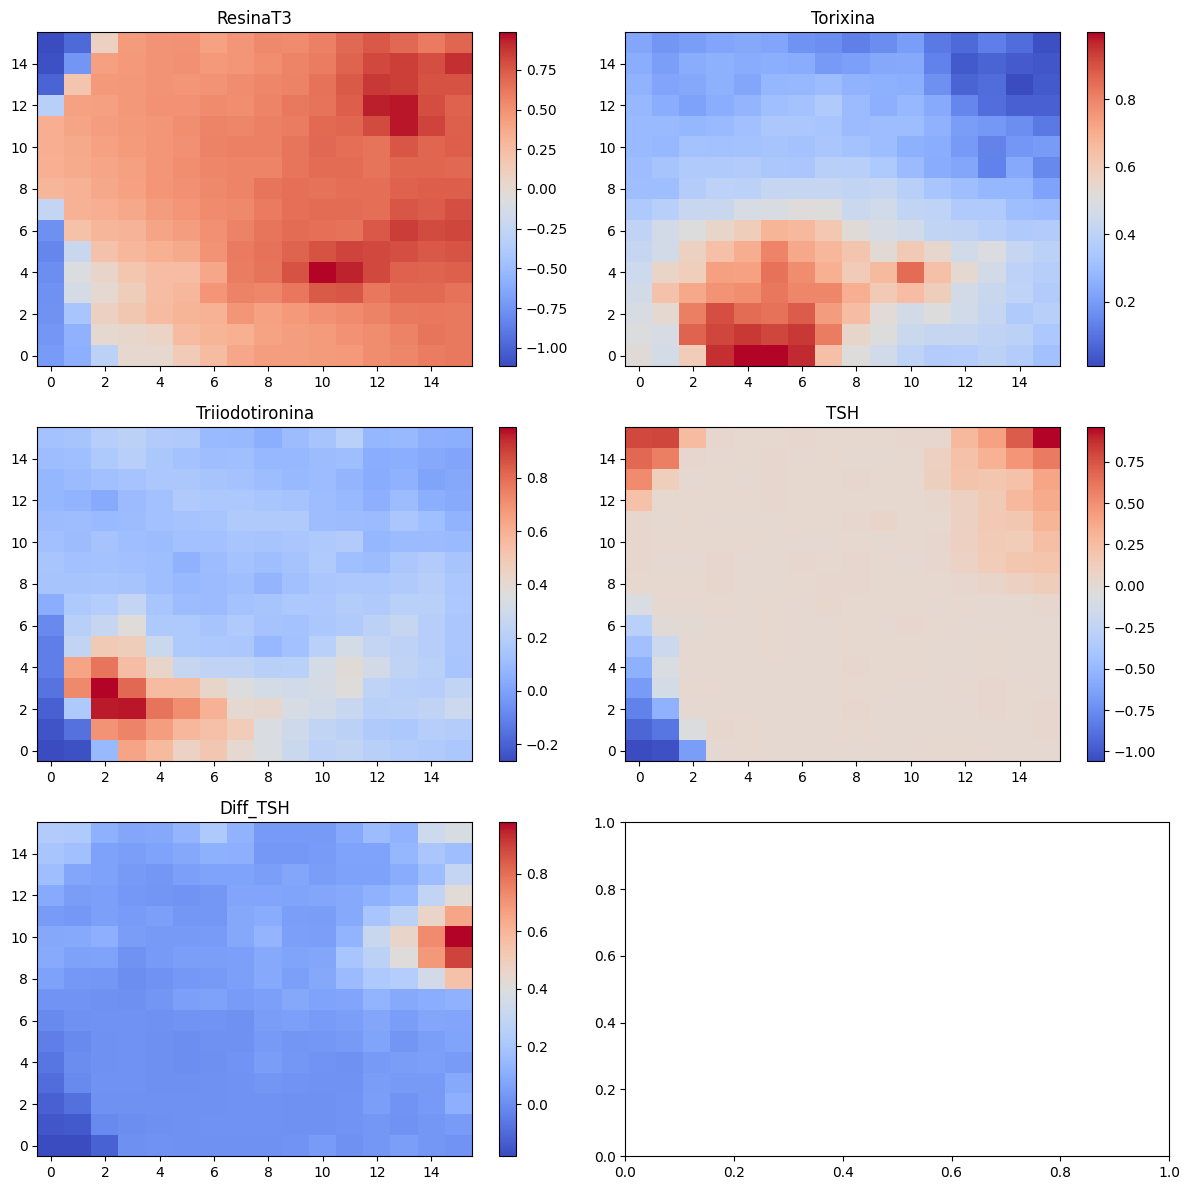

In [92]:
feature_names = dataset.columns[:-1]  
weights = som.get_weights()
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()
for i in range(input_len):
	im = axes[i].imshow(weights[:, :, i].T, cmap='coolwarm', origin='lower', aspect='auto')
	axes[i].set_title(feature_names[i])
	fig.colorbar(im, ax=axes[i])
plt.tight_layout()
plt.show()

errors = []

for i in range(input_len):
    feature_error = 0
    for x in X:
        bmu = som.winner(x)
        weight = som.get_weights()[bmu[0], bmu[1], i]
        feature_error += abs(x[i] - weight)
    mean_error = feature_error / len(X)
    errors.append(mean_error)



##### 7. Altere a função de vizinhança. Avalie o resultado.

### Reposta 
A função de vizinhança foi alterada entre as opções disponíveis na biblioteca ('gaussian', 'bubble', 'triangle', 'mexican_hat') para avaliar seu impacto no SOM. No entanto, os resultados mostraram pouca variação nos erros e na organização do mapa, indicando que, neste caso, a função escolhida não influenciou significativamente o desempenho. Assim, manteve-se a função 'gaussian' por padrão.

 [ 6000 / 6000 ] 100% - 0:00:00 left 
 quantization error: 0.137763635220934


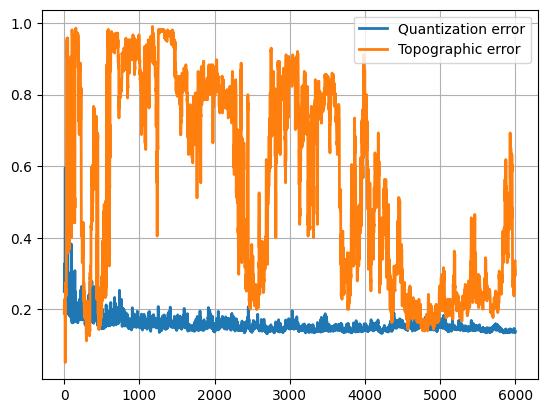

In [97]:
from sklearn.preprocessing import StandardScaler

def decay_fcn(lr,actual_t,max_t):
    '''
    Função para decaimento da taxa de aprendizado.

    ## INPUTS:
    lr - Taxa de aprendizado inicial
    actual_t - Tempo atual da iteração
    max_t - Tempo máximo da iteração

    ## OUTPUT:
    - taxa de aprendizado atualizada.
    '''
    new_lr = lr * np.exp(-actual_t / max_t) # Exponential decay

    return new_lr


m = 16 #Dimensão X do mapa de Kohonen
n = 16 #Dimensão Y do mapa de Kohonen

#dim = [m, n]

lr_ordering = 0.9 #Taxa de aprendizado - Ordering phase
lr_finetuning = 0.001 #Taxa de aprendizado - Finetuning phase


topology = "rectangular"

ordering_time = 6000
finetuning_time = 10000

#tuning_time = [ordering_time, finetuning_time]

decay_fun =  decay_fcn


#Dimensão do vetor de entrada
input_len = values.shape[1]

X = minmax_scale(values)

som = MiniSom(m,n,input_len,learning_rate=lr_ordering,topology=topology,decay_function=decay_fcn, neighborhood_function='bubble')
som.pca_weights_init(values)

som.train_random(X, ordering_time, verbose=True)

plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.13109554932268158


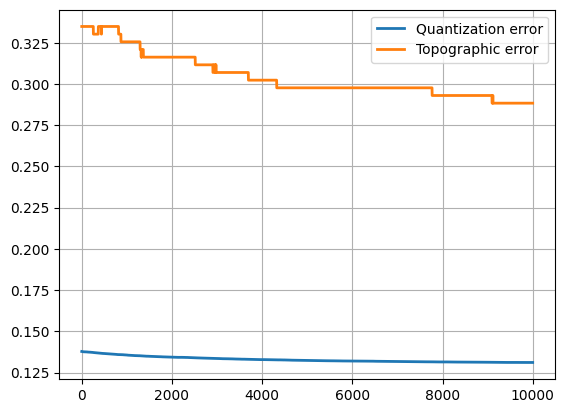

In [98]:
som._learning_rate = lr_finetuning #Para mudar a taxa de aprendizado durante o período de finetuning
som.train_random(X, finetuning_time, verbose=True)

plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

 [ 6000 / 6000 ] 100% - 0:00:00 left 
 quantization error: 0.12953465254847793


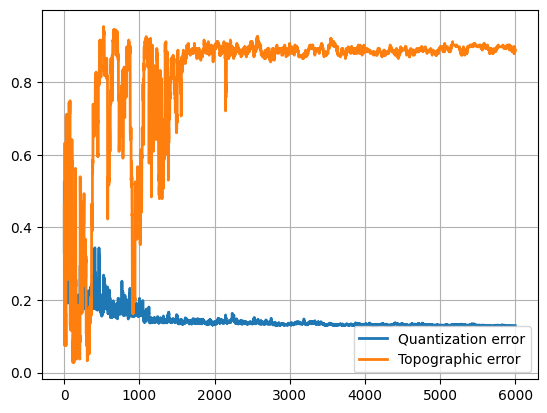

In [99]:
from sklearn.preprocessing import StandardScaler

def decay_fcn(lr,actual_t,max_t):
    '''
    Função para decaimento da taxa de aprendizado.

    ## INPUTS:
    lr - Taxa de aprendizado inicial
    actual_t - Tempo atual da iteração
    max_t - Tempo máximo da iteração

    ## OUTPUT:
    - taxa de aprendizado atualizada.
    '''
    new_lr = lr * np.exp(-actual_t / max_t) # Exponential decay

    return new_lr


m = 16 #Dimensão X do mapa de Kohonen
n = 16 #Dimensão Y do mapa de Kohonen

#dim = [m, n]

lr_ordering = 0.9 #Taxa de aprendizado - Ordering phase
lr_finetuning = 0.001 #Taxa de aprendizado - Finetuning phase


topology = "rectangular"

ordering_time = 6000
finetuning_time = 10000

#tuning_time = [ordering_time, finetuning_time]

decay_fun =  decay_fcn


#Dimensão do vetor de entrada
input_len = values.shape[1]

X = minmax_scale(values)

som = MiniSom(m,n,input_len,learning_rate=lr_ordering,topology=topology,decay_function=decay_fcn, neighborhood_function='triangle')
som.pca_weights_init(values)

som.train_random(X, ordering_time, verbose=True)

plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.1292270154518095


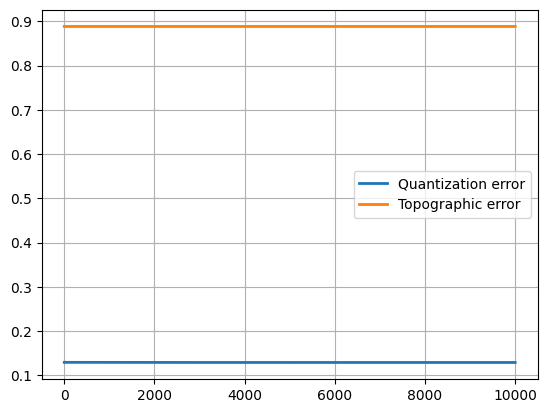

In [100]:
som._learning_rate = lr_finetuning #Para mudar a taxa de aprendizado durante o período de finetuning
som.train_random(X, finetuning_time, verbose=True)

plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

 [ 6000 / 6000 ] 100% - 0:00:00 left 
 quantization error: 0.18206517367258748


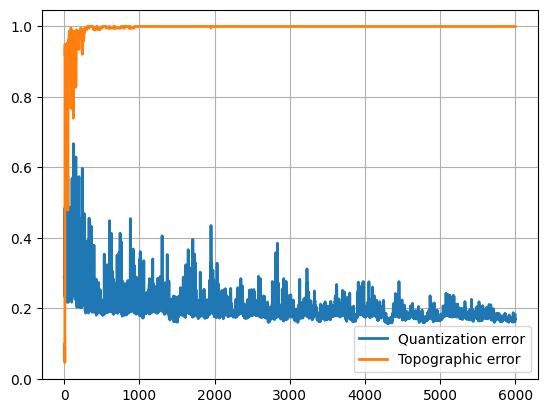

In [101]:
from sklearn.preprocessing import StandardScaler

def decay_fcn(lr,actual_t,max_t):
    '''
    Função para decaimento da taxa de aprendizado.

    ## INPUTS:
    lr - Taxa de aprendizado inicial
    actual_t - Tempo atual da iteração
    max_t - Tempo máximo da iteração

    ## OUTPUT:
    - taxa de aprendizado atualizada.
    '''
    new_lr = lr * np.exp(-actual_t / max_t) # Exponential decay

    return new_lr


m = 16 #Dimensão X do mapa de Kohonen
n = 16 #Dimensão Y do mapa de Kohonen

#dim = [m, n]

lr_ordering = 0.9 #Taxa de aprendizado - Ordering phase
lr_finetuning = 0.001 #Taxa de aprendizado - Finetuning phase


topology = "rectangular"

ordering_time = 6000
finetuning_time = 10000

#tuning_time = [ordering_time, finetuning_time]

decay_fun =  decay_fcn


#Dimensão do vetor de entrada
input_len = values.shape[1]

X = minmax_scale(values)

som = MiniSom(m,n,input_len,learning_rate=lr_ordering,topology=topology,decay_function=decay_fcn, neighborhood_function='mexican_hat')
som.pca_weights_init(values)

som.train_random(X, ordering_time, verbose=True)

plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.1572697490568781


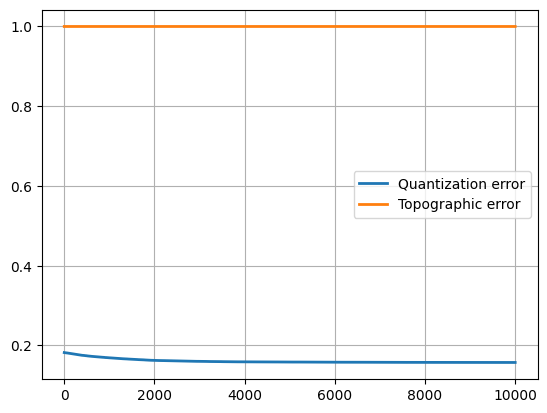

In [102]:
som._learning_rate = lr_finetuning #Para mudar a taxa de aprendizado durante o período de finetuning
som.train_random(X, finetuning_time, verbose=True)

plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

## Parte 2 - Análise dos mapas

##### 1. Teste novas configurações para o modelo SOM para obter um melhor resultado. Justifique a escolha dos parâmetros do modelo selecionado.

Nesta configuração, a dimensão da rede foi aumentada para 26×26, mantendo a topologia retangular e a função de decaimento exponencial. O tempo de ordenação foi ampliado para 2000 épocas e a taxa de aprendizado do ajuste fino ajustada para 0.002. Em comparação com o teste anterior, esta configuração apresentou uma leve melhora nos erros de quantização e topográfico.

 [ 2000 / 2000 ] 100% - 0:00:00 left 
 quantization error: 0.02622838093124065


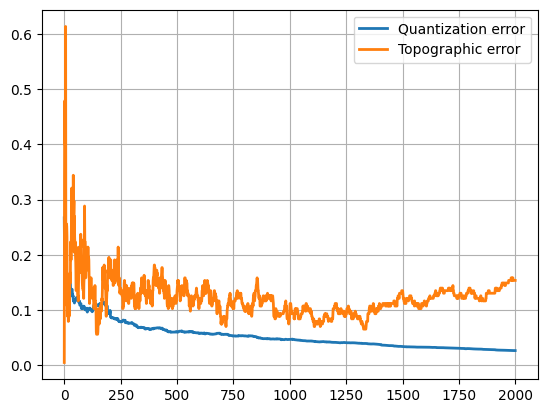

In [125]:
from sklearn.preprocessing import StandardScaler

def decay_fcn(lr,actual_t,max_t):
    '''
    Função para decaimento da taxa de aprendizado.

    ## INPUTS:
    lr - Taxa de aprendizado inicial
    actual_t - Tempo atual da iteração
    max_t - Tempo máximo da iteração

    ## OUTPUT:
    - taxa de aprendizado atualizada.
    '''
    new_lr = lr * np.exp(-actual_t / max_t) # Exponential decay

    return new_lr


m = 26 #Dimensão X do mapa de Kohonen
n = 26 #Dimensão Y do mapa de Kohonen

#dim = [m, n]

lr_ordering = 0.9 #Taxa de aprendizado - Ordering phase
lr_finetuning = 0.002 #Taxa de aprendizado - Finetuning phase


topology = "rectangular"

ordering_time = 2000
finetuning_time = 10000

#tuning_time = [ordering_time, finetuning_time]

decay_fun =  decay_fcn


#Dimensão do vetor de entrada
input_len = values.shape[1]

X = minmax_scale(values)

som = MiniSom(m,n,input_len,learning_rate=lr_ordering,topology=topology,decay_function=decay_fcn, neighborhood_function='gaussian')
som.pca_weights_init(values)

som.train_random(X, ordering_time, verbose=True)

plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.029219951881947943


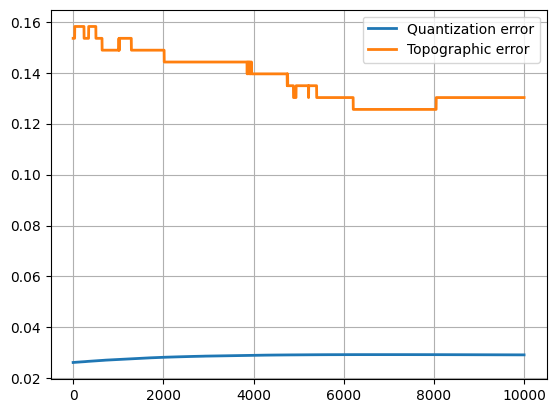

In [126]:
som._learning_rate = lr_finetuning #Para mudar a taxa de aprendizado durante o período de finetuning
som.train_random(X, finetuning_time, verbose=True)

plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

Nesta configuração, a dimensão da rede foi reduzida para 24×24 o tempo de treinamento foi aumentado para 7000 iterações, mantendo a topologia retangular, a função de decaimento exponencial e a vizinhança gaussiana. A taxa de aprendizado lr_ordering foi reduzida para 0.09, com o objetivo de estabilizar o treinamento. Embora o gráfico tenha mostrado uma evolução mais suave e estável, o erro de quantização final aumentou ligeiramente em comparação com o melhor teste anterior, o que indica que esse hiperparâmetro teve influência direta no desempenho.

 [ 7000 / 7000 ] 100% - 0:00:00 left 
 quantization error: 0.051033234023405295


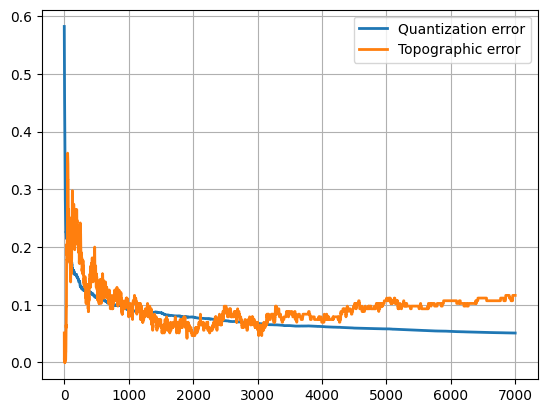

In [133]:
from sklearn.preprocessing import StandardScaler

def decay_fcn(lr,actual_t,max_t):
    '''
    Função para decaimento da taxa de aprendizado.

    ## INPUTS:
    lr - Taxa de aprendizado inicial
    actual_t - Tempo atual da iteração
    max_t - Tempo máximo da iteração

    ## OUTPUT:
    - taxa de aprendizado atualizada.
    '''
    new_lr = lr * np.exp(-actual_t / max_t) # Exponential decay

    return new_lr


m = 24 #Dimensão X do mapa de Kohonen
n = 24 #Dimensão Y do mapa de Kohonen

#dim = [m, n]

lr_ordering = 0.09 #Taxa de aprendizado - Ordering phase
lr_finetuning = 0.005 #Taxa de aprendizado - Finetuning phase


topology = "rectangular"

ordering_time = 7000
finetuning_time = 10000

#tuning_time = [ordering_time, finetuning_time]

decay_fun =  decay_fcn


#Dimensão do vetor de entrada
input_len = values.shape[1]

X = minmax_scale(values)

som = MiniSom(m,n,input_len,learning_rate=lr_ordering,topology=topology,decay_function=decay_fcn, neighborhood_function='gaussian')
som.pca_weights_init(values)

som.train_random(X, ordering_time, verbose=True)

plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.057458391623674374


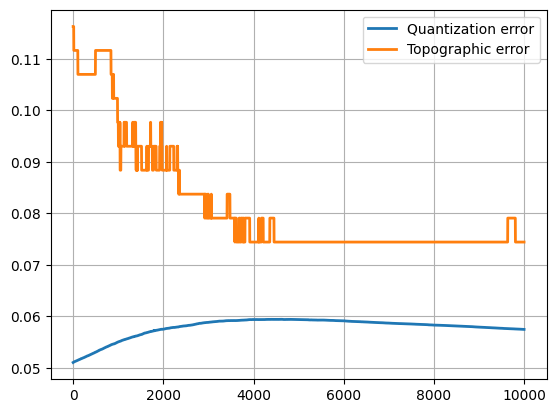

In [134]:
som._learning_rate = lr_finetuning #Para mudar a taxa de aprendizado durante o período de finetuning
som.train_random(X, finetuning_time, verbose=True)

plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

Nesta configuração final, a rede foi mantida com dimensão 24×24 e topologia retangular. O tempo de treinamento foi de 7000 iterações na fase de ordenação e 10000 na fase de ajuste fino. A função de decaimento exponencial foi utilizada, com função de vizinhança gaussiana. A taxa de aprendizado lr_ordering foi ajustada para 0.8, resultando na melhor performance até o momento: o menor erro de quantização observado (≈ 0.0077) e um erro topográfico estável. Essa combinação de parâmetros demonstrou uma excelente capacidade de organização do mapa e boa separação das classes.

 [ 7000 / 7000 ] 100% - 0:00:00 left 
 quantization error: 0.007735837879366013


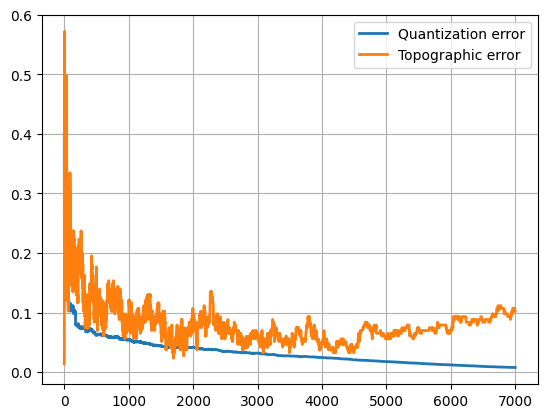

In [152]:
from sklearn.preprocessing import StandardScaler

def decay_fcn(lr,actual_t,max_t):
    '''
    Função para decaimento da taxa de aprendizado.

    ## INPUTS:
    lr - Taxa de aprendizado inicial
    actual_t - Tempo atual da iteração
    max_t - Tempo máximo da iteração

    ## OUTPUT:
    - taxa de aprendizado atualizada.
    '''
    new_lr = lr * np.exp(-actual_t / max_t) # Exponential decay

    return new_lr


m = 24 #Dimensão X do mapa de Kohonen
n = 24 #Dimensão Y do mapa de Kohonen

#dim = [m, n]

lr_ordering = 0.8 #Taxa de aprendizado - Ordering phase
lr_finetuning = 0.005 #Taxa de aprendizado - Finetuning phase


topology = "rectangular"

ordering_time = 7000
finetuning_time = 10000

#tuning_time = [ordering_time, finetuning_time]

decay_fun =  decay_fcn


#Dimensão do vetor de entrada
input_len = values.shape[1]

X = minmax_scale(values)

som = MiniSom(m,n,input_len,learning_rate=lr_ordering,topology=topology,decay_function=decay_fcn, neighborhood_function='gaussian')
som.pca_weights_init(values)

som.train_random(X, ordering_time, verbose=True)

plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.014035681991633464


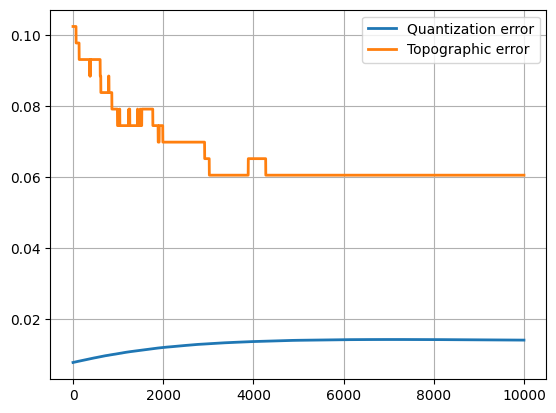

In [153]:
som._learning_rate = lr_finetuning #Para mudar a taxa de aprendizado durante o período de finetuning
som.train_random(X, finetuning_time, verbose=True)

plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

##### 2. Utilizando a melhor configuração do item anterior, analise os diferentes mapas fornecidos e caracterize os grupos de pacientes obtidos.

### Resposta
A partir dos mapas gerados, é possível ver que os grupos foram bem separados no espaço do mapa. A U-Matrix mostra regiões com alta distância entre neurônios, indicando fronteiras entre os grupos. O mapa de vencedores também mostra uma distribuição equilibrada das ativações, com pouca sobreposição. Isso indica que o modelo conseguiu organizar os pacientes de forma coerente, provavelmente influenciado pela presença de outliers e pela distribuição dos dados nas variáveis. 

Além disso, ao observar o gráfico final com todos os pontos atribuídos aos seus respectivos neurônios vencedores, nota-se que cada grupo de pacientes ocupa regiões bem definidas do mapa. Apesar de existirem alguns pontos isolados (possíveis outliers), a maioria está agrupada de forma coerente, o que reforça a boa organização alcançada pelo modelo.

In [ ]:
from sklearn.preprocessing import StandardScaler

def decay_fcn(lr,actual_t,max_t):
    '''
    Função para decaimento da taxa de aprendizado.

    ## INPUTS:
    lr - Taxa de aprendizado inicial
    actual_t - Tempo atual da iteração
    max_t - Tempo máximo da iteração

    ## OUTPUT:
    - taxa de aprendizado atualizada.
    '''
    new_lr = lr * np.exp(-actual_t / max_t) # Exponential decay

    return new_lr


m = 24 #Dimensão X do mapa de Kohonen
n = 24 #Dimensão Y do mapa de Kohonen

#dim = [m, n]

lr_ordering = 0.8 #Taxa de aprendizado - Ordering phase
lr_finetuning = 0.005 #Taxa de aprendizado - Finetuning phase


topology = "rectangular"

ordering_time = 7000
finetuning_time = 10000

#tuning_time = [ordering_time, finetuning_time]

decay_fun =  decay_fcn


#Dimensão do vetor de entrada
input_len = values.shape[1]

X = minmax_scale(values)

som = MiniSom(m,n,input_len,learning_rate=lr_ordering,topology=topology,decay_function=decay_fcn, neighborhood_function='gaussian')
som.pca_weights_init(values)

som.train_random(X, ordering_time, verbose=True)

plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

 [ 5128 / 7000 ]  73% - 0:00:10 left 

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.013838783783182072


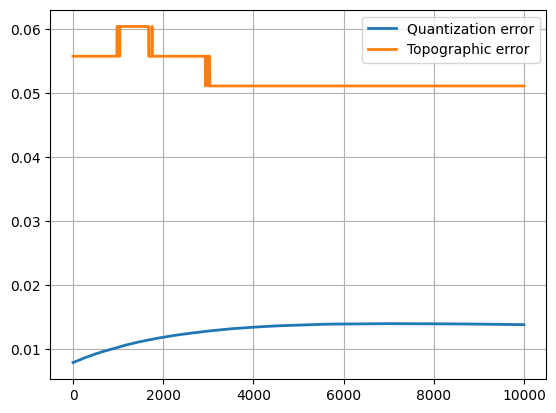

In [163]:
som._learning_rate = lr_finetuning #Para mudar a taxa de aprendizado durante o período de finetuning
som.train_random(X, finetuning_time, verbose=True)

plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

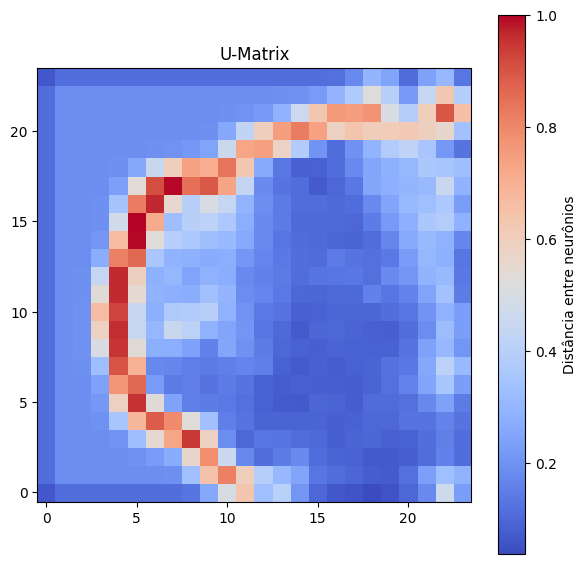

In [164]:
# Calcular a U-Matrix
umatrix = som.distance_map()

# Plotar
plt.figure(figsize=(7, 7))
plt.imshow(umatrix.T, cmap='coolwarm', origin='lower')  # .T para transpor se necessário
plt.colorbar(label='Distância entre neurônios')
plt.title('U-Matrix')
plt.show()

Winning map (número de vezes que cada neurônio foi vencedor):
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 2. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 

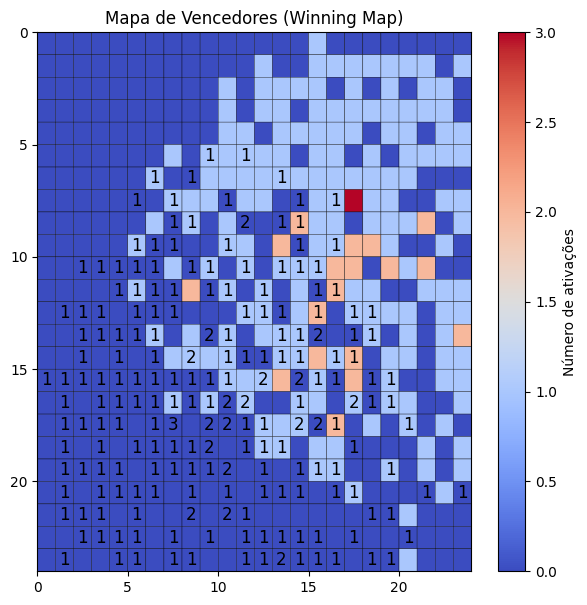

In [165]:
# Inicializar o recalcular o mapa de vitórias
win_map = np.zeros((som.x, som.y))  

# Para cada amostra, incrementar o contador da BMU
for x in X:
    i, j = som.winner(x)
    win_map[i, j] += 1

print("Winning map (número de vezes que cada neurônio foi vencedor):")
print(win_map)

# Visualização
plt.figure(figsize=(7, 7))
plt.pcolor(win_map.T, cmap='coolwarm', edgecolors='k') 
plt.colorbar(label='Número de ativações')
plt.title('Mapa de Vencedores (Winning Map)')

# Adiciona os valores dentro das células
for i in range(win_map.shape[0]):
    for j in range(win_map.shape[1]):
        count = int(win_map[i, j])
        if count > 0:
            plt.text(j + 0.5, i + 0.5, str(count),
                     ha='center', va='center', color='black', fontsize=12)

plt.gca().invert_yaxis()  # opcional, se quiser alinhar com U-Matrix
plt.show()


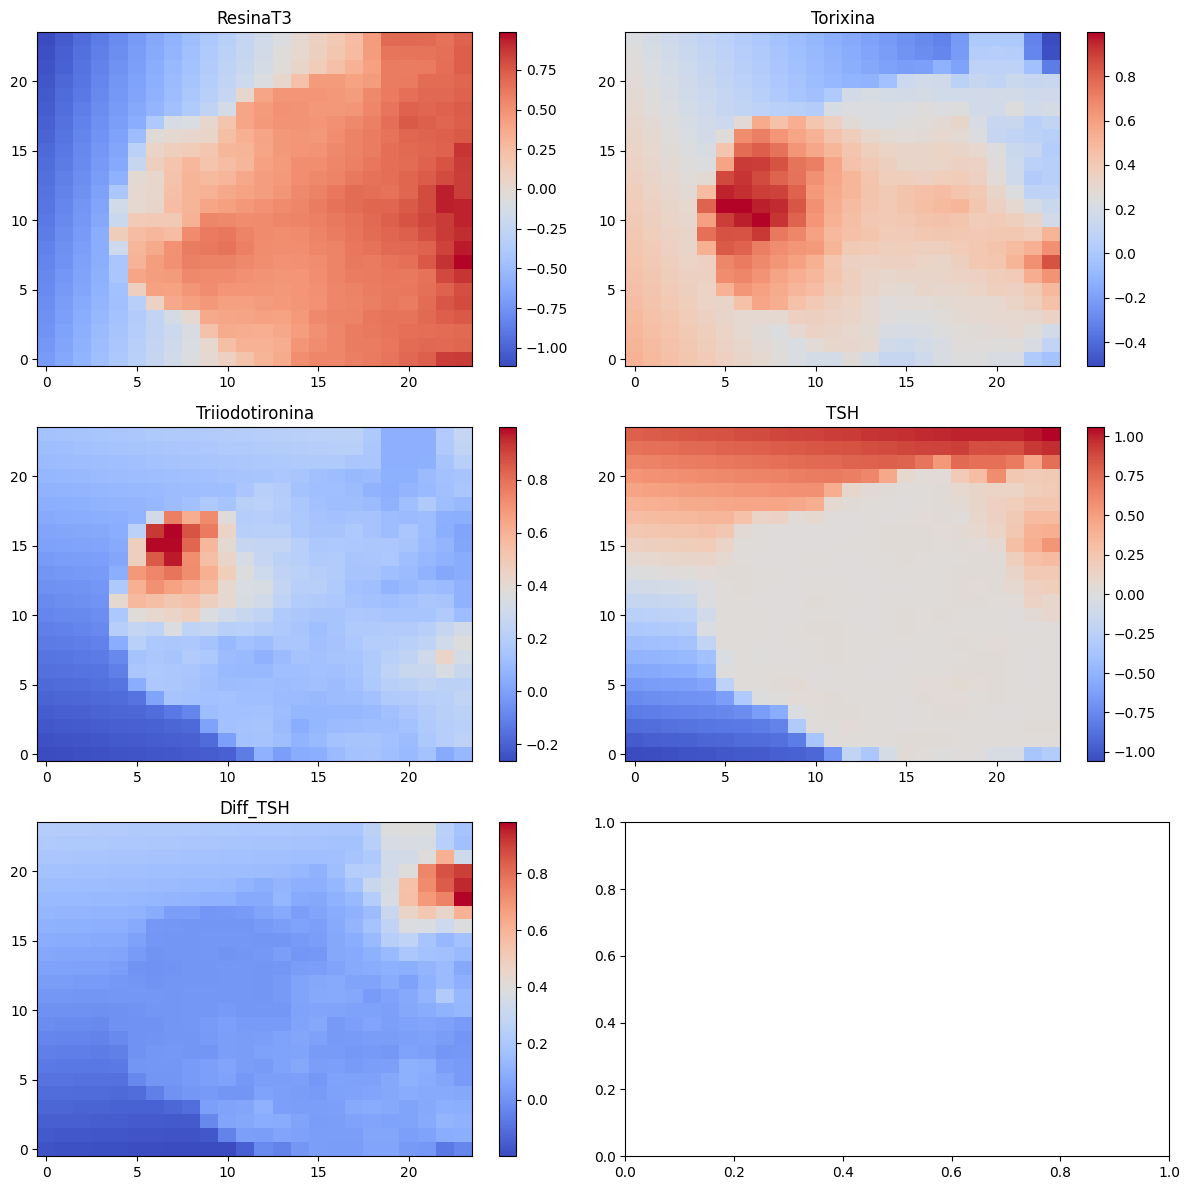

In [166]:
feature_names = dataset.columns[:-1]  
weights = som.get_weights()
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()
for i in range(input_len):
	im = axes[i].imshow(weights[:, :, i].T, cmap='coolwarm', origin='lower', aspect='auto')
	axes[i].set_title(feature_names[i])
	fig.colorbar(im, ax=axes[i])
plt.tight_layout()
plt.show()

errors = []

for i in range(input_len):
    feature_error = 0
    for x in X:
        bmu = som.winner(x)
        weight = som.get_weights()[bmu[0], bmu[1], i]
        feature_error += abs(x[i] - weight)
    mean_error = feature_error / len(X)
    errors.append(mean_error)

